# DATA VISUALIZATION COURSE PROJECT

### <font color="brown"> TOPIC - POWER AND ENERGY </font> 

#### ------- BY Ankita Anand  210150006

### <i>My project explore the progress of India in shifting into self reliant nation who can meet its energy requirement (primarily electricity ) on its own</i>

### Import Libraries

pip install geopandas

In [1]:
import pandas as pd
from plotnine import *
import geopandas as gpd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#  Per capita consumption of electricity(kwh) from 2006-07 to 2011-12

In [2]:
# Load dataset
per_capita_electricity_consumption_df=pd.read_csv("data/Per_capita_consumption_of_electricity_(kwh)_from_2006-0_ to_2011-12.csv")

# Melt the DataFrame to long format
df_melted = pd.melt(per_capita_electricity_consumption_df[['Region/State/U.T.','2006-07','2011-12']], id_vars=['Region/State/U.T.'], 
                    var_name='Year', value_name='Per Capita Electricity Consumption (kWh)')

# Line Plot
line_plot=(ggplot(df_melted, aes(x='Region/State/U.T.', y='Per Capita Electricity Consumption (kWh)', color='Year', group='Year')) +
 geom_line() +
 geom_point() +
 theme(figure_size=(12,6),axis_text_x=element_text(rotation=90, hjust=1)) +
 labs(title='Per Capita Electricity Consumption by Region/State (2006-07 vs 2011-12)', x='Region/State/U.T.', y='Per Capita Electricity Consumption (kWh)', color='Year') +
 scale_color_manual(values=[ 'green','brown'], labels=['2006-07','2011-12']) +  # Optional: set color for each year
 guides(color=guide_legend(title='Year'))  # Optional: customize legend
)

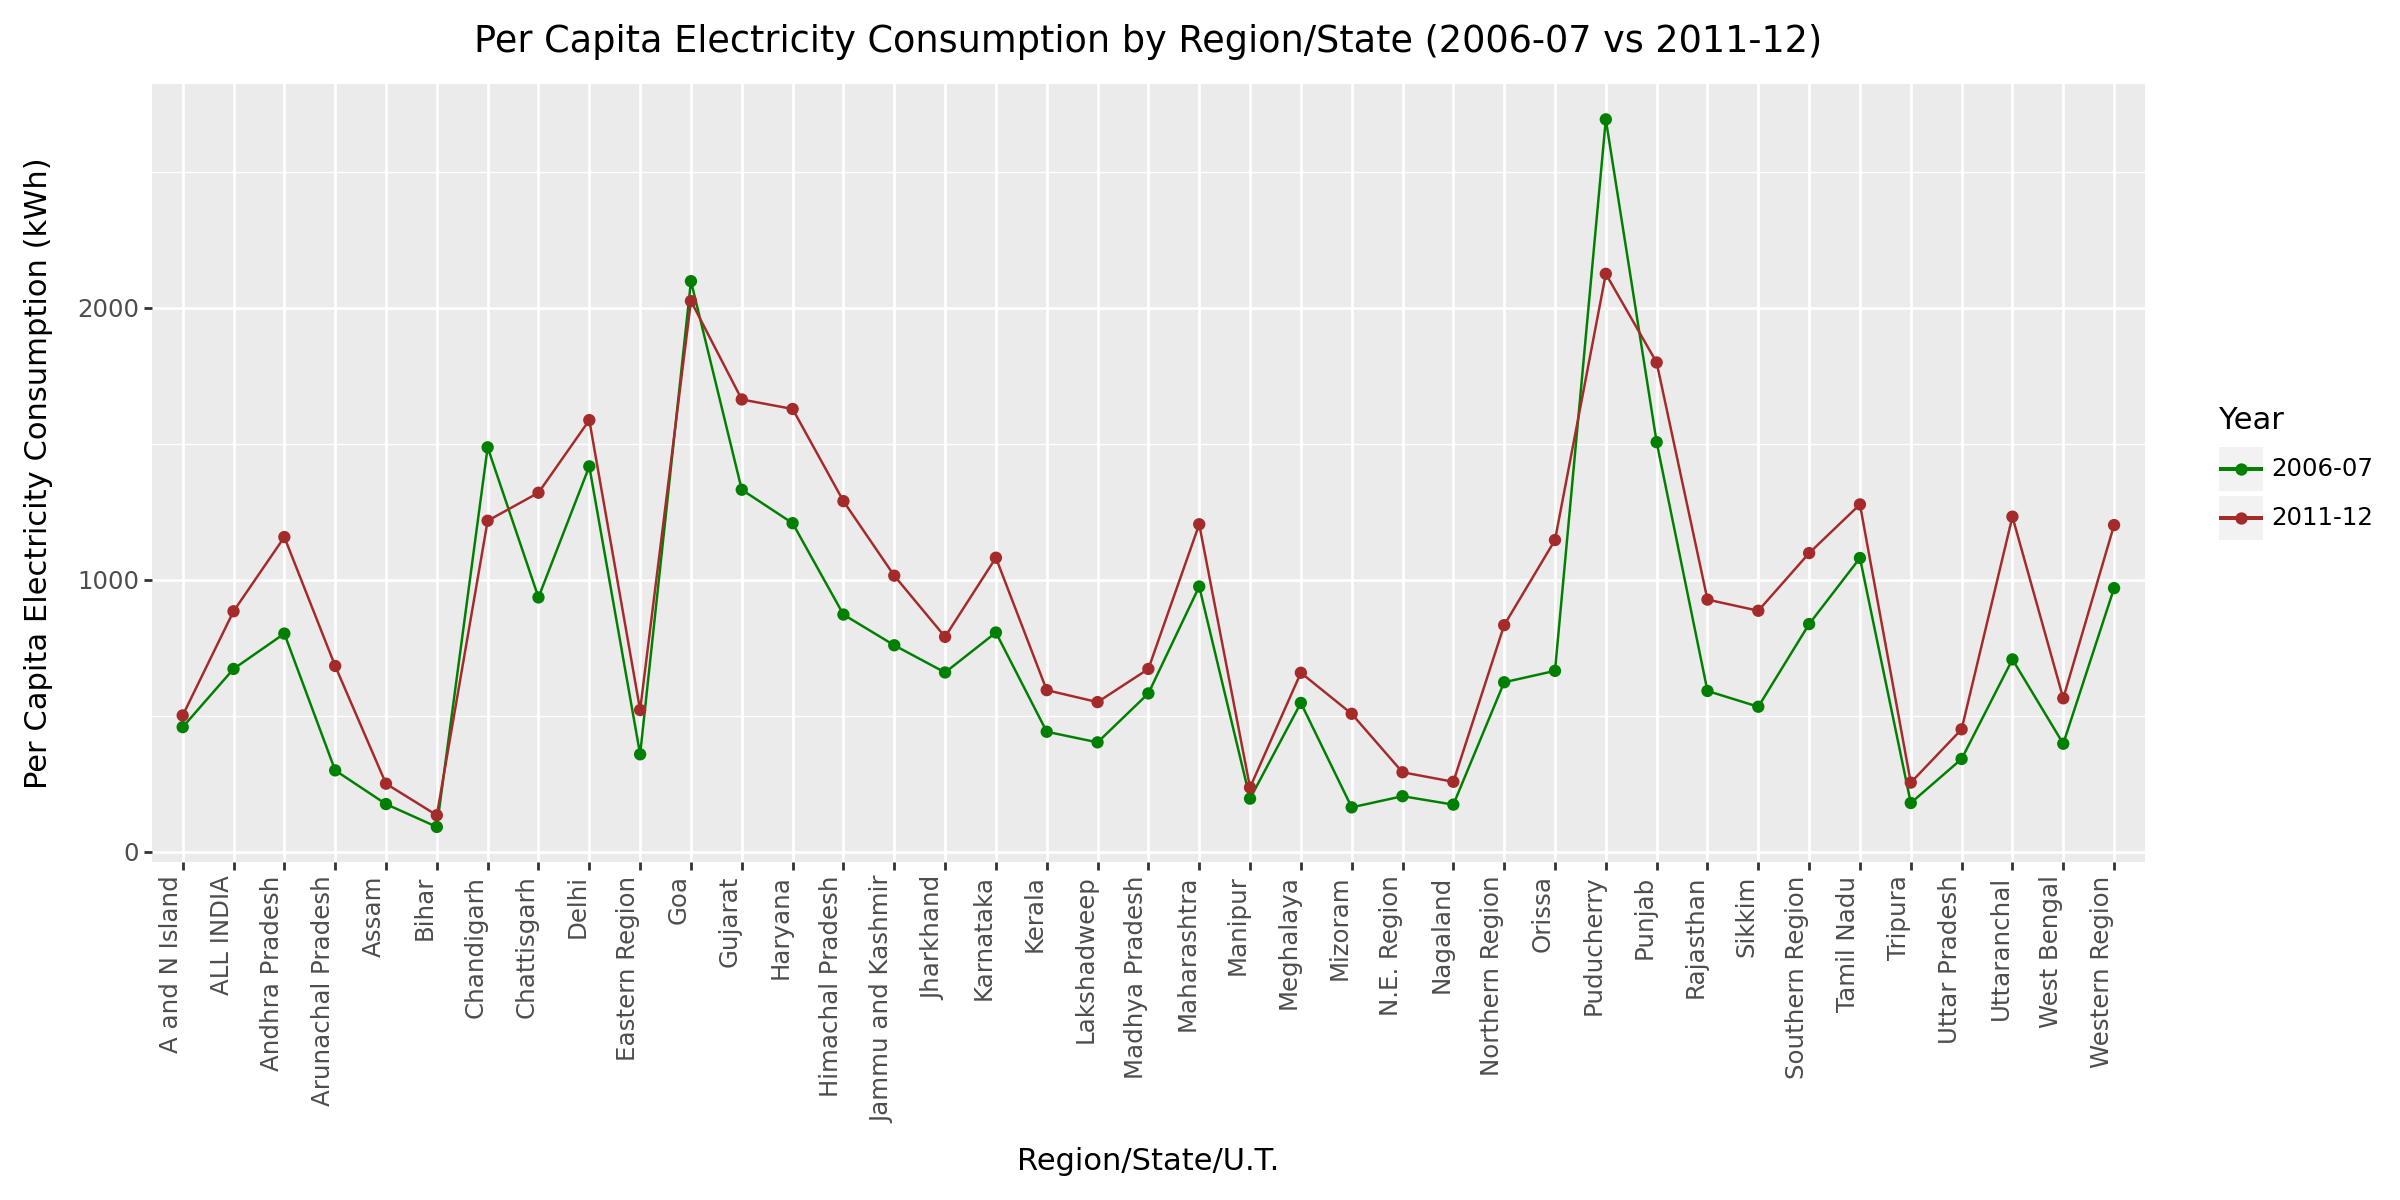

In [3]:
line_plot.show()

#### Interactive Area plot of Per Capita Electricity Consumption (2006-07 to 2011-12)

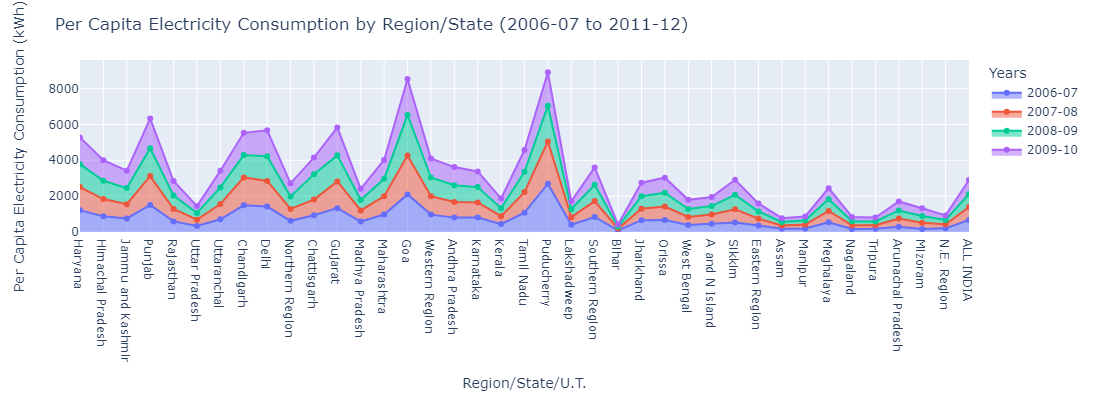

In [4]:
fig = px.area(per_capita_electricity_consumption_df, x='Region/State/U.T.', y=["2006-07","2007-08",'2008-09',"2009-10"],markers=True)

# Add labels
fig.update_layout(
    xaxis_title='Region/State/U.T.',
    yaxis_title='Per Capita Electricity Consumption (kWh)',
    title='Per Capita Electricity Consumption by Region/State (2006-07 to 2011-12)',
    width=1000,  # Specify the width of the plot
    height=400,  # Specify the height of the plot
    legend_title_text='Years'  # Change legend title to 'Years'
)


### <font color ='green'> Why Area Plot ? </font> 
1. Visualizing Trends: An area plot provides a clear visualization of trends in per capita electricity consumption over the specified period.<br>
2. Comparing States: The stacked nature of the area plot allows for easy comparison between states

### <font color='blue'>Observations </font>
 1. Over the years per capita electricity consumption has only increased.
 2. Poducherry, Goa, Chandigarh have maximum per capita consumption, despite being just union territory.
 3. Punjab and Gujrat have maximum per capita consumption among states.
 4. North East states and Bihar have least per capita electricity consumption

### Interactive box plot for all India Per Capita Electricity Consumption over years

C:\bigdata\anaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



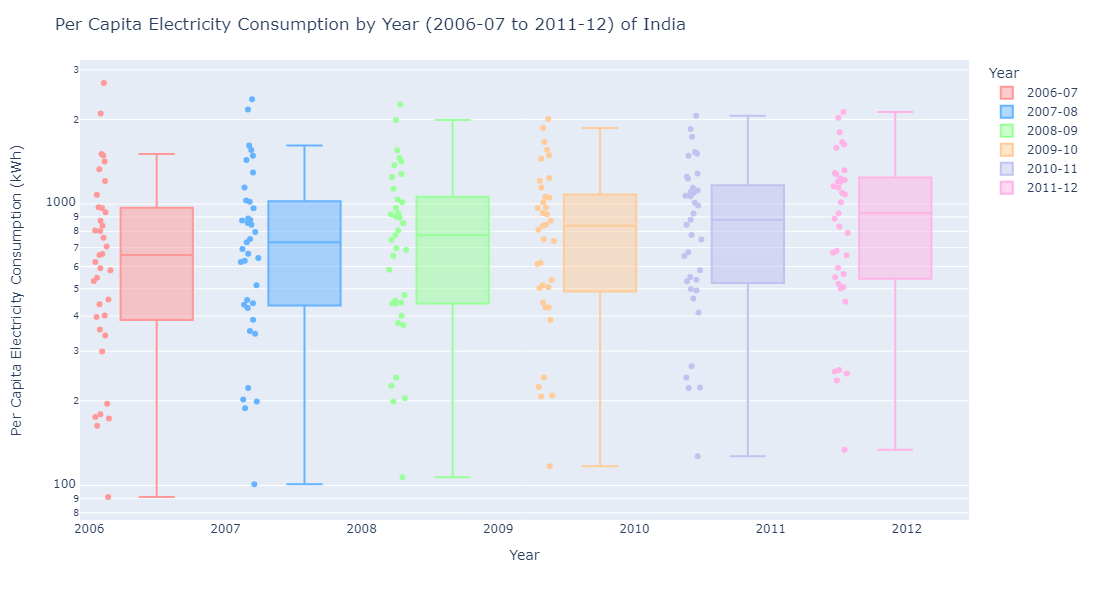

In [5]:
# Melt the DataFrame to long format , removing region data to avoid redundancy 
df_melted = pd.melt(per_capita_electricity_consumption_df[:37], id_vars=['Region/State/U.T.'], var_name='Year', value_name='Per Capita Electricity Consumption (kWh)')



# Define custom colors for each year
custom_colors = {'2006-07': '#ff9999', '2007-08': '#66b3ff', '2008-09': '#99ff99', '2009-10': '#ffcc99', '2010-11': '#c2c2f0', '2011-12': '#ffb3e6'}

# Plotly box plot
fig = px.box(df_melted, x='Year', y='Per Capita Electricity Consumption (kWh)', color='Year', points="all", color_discrete_map=custom_colors)

# Apply log transformation to the y-axis
fig.update_yaxes(type="log")

# Update layout
fig.update_layout(
    title='Per Capita Electricity Consumption by Year (2006-07 to 2011-12) of India',
    xaxis_title='Year',
    yaxis_title='Per Capita Electricity Consumption (kWh)',
    legend_title='Year',
    width=1200,
    height=600
)

fig.show()

### <font color ='green'> Why Box Plot ? </font> 
1. Summary of Distribution: A box plot provides a clear summary of the distribution of per capita electricity consumption across different years. It displays key statistics such as the median, quartiles, and outliers.<br>
2. Outliers, which are data points that significantly differ from the rest of the data, can be easily identified in a box plot. These outliers may indicate unusual or exceptional circumstances affecting electricity consumption in certain States in certain years. <br>
3. Changes in the median or spread of the box plot over time indicate shifts in the central tendency or variability of per capita electricity consumption

### <font color='blue'>Observations </font>
1. Median of per capita consumption has incresed over the years.
2. Maximum consumption outlier is in the year 2006.

# Power from renewable sources of energy

In [6]:
# Loading Dataset
renewable=pd.read_csv("data/Power_from_renewable_sources_of_energy_in_India.csv")
renewable_grid=renewable[:6]

In [7]:
df=renewable_grid[['Renewable Energy Systems','Target for 2012-13','Total Deployment in 2012-13']]

# Convert numerical columns to float
numerical_columns = ['Target for 2012-13', 'Total Deployment in 2012-13']
df[numerical_columns] = df[numerical_columns].astype(float)

C:\Users\Ankita Anand\AppData\Local\Temp\ipykernel_24668\2729741511.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



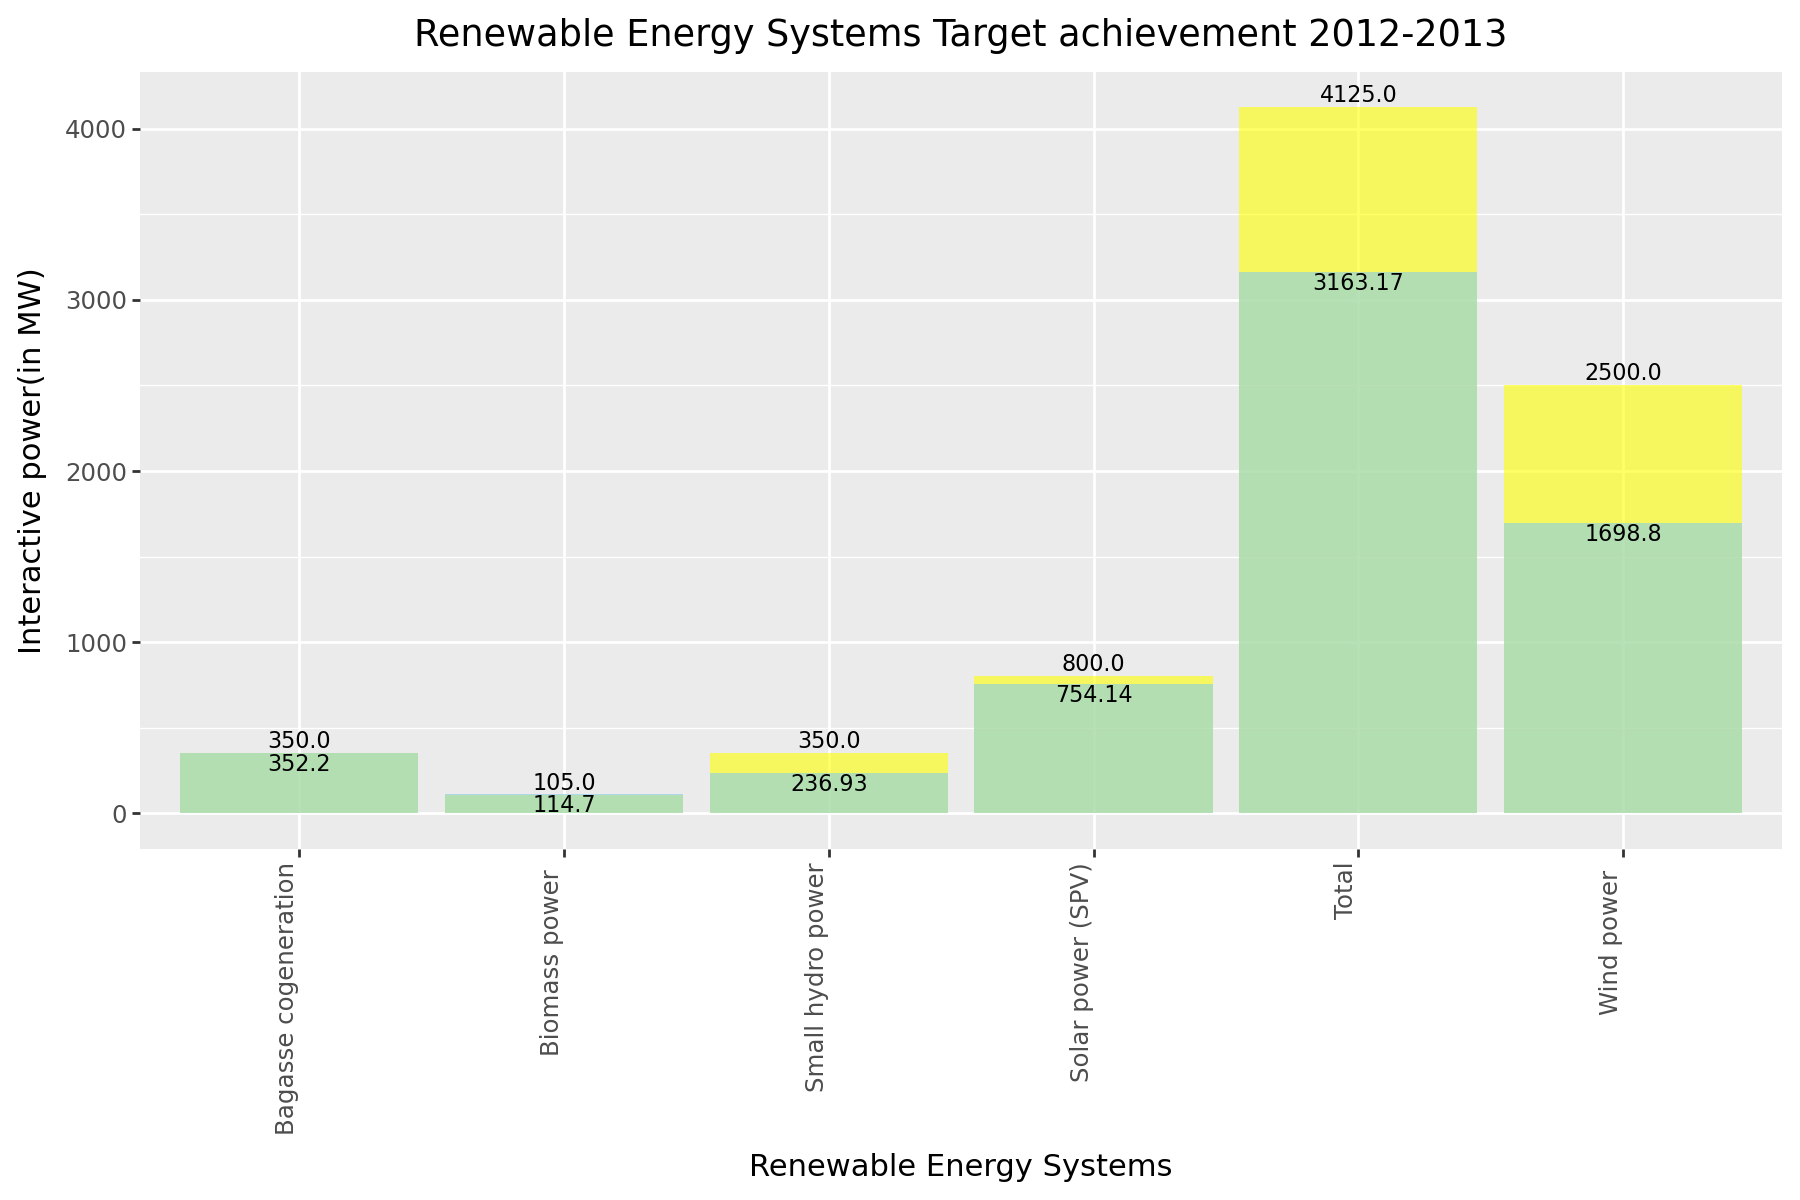

In [8]:
# plotting Bar graph
(ggplot(df, aes(x="Renewable Energy Systems"))
 + geom_bar(aes(y="Target for 2012-13"), stat="identity", fill="yellow", position="dodge", alpha=0.6)
 + geom_bar(aes(y="Total Deployment in 2012-13"), stat="identity", fill="skyblue", position="dodge", alpha=0.6)
 + geom_text(aes(y="Target for 2012-13", label="Target for 2012-13"), position=position_dodge(width=0.2), va="bottom", color="black", size=8)
 + geom_text(aes(y="Total Deployment in 2012-13", label="Total Deployment in 2012-13"), position=position_dodge(width=0.9), va="top", color="black", size=8)
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(9,6))
 + labs(title="Renewable Energy Systems Target achievement 2012-2013", x="Renewable Energy Systems", y="Interactive power(in MW)")
 + scale_fill_manual(values=["yellow", "skyblue"], name="Legend", labels=["Target for 2012-13", "Total Deployment in 2012-13"])
 + guides(fill=guide_legend(title="Legend"))
)


### <font color ='green'> Why Bar Plot ? </font> 
To highlight the key observation regarding the deployment targets versus actual deployment of renewable energy sectors, a bar chart chart would be best. <br>
This visualization allows for a clear comparison between the target values and the actual deployment values for each sector, making it easy to identify which sectors exceeded their targets and which fell short.

#### Interactive plot for Renewable Energy Systems Target achievement 2012-2013

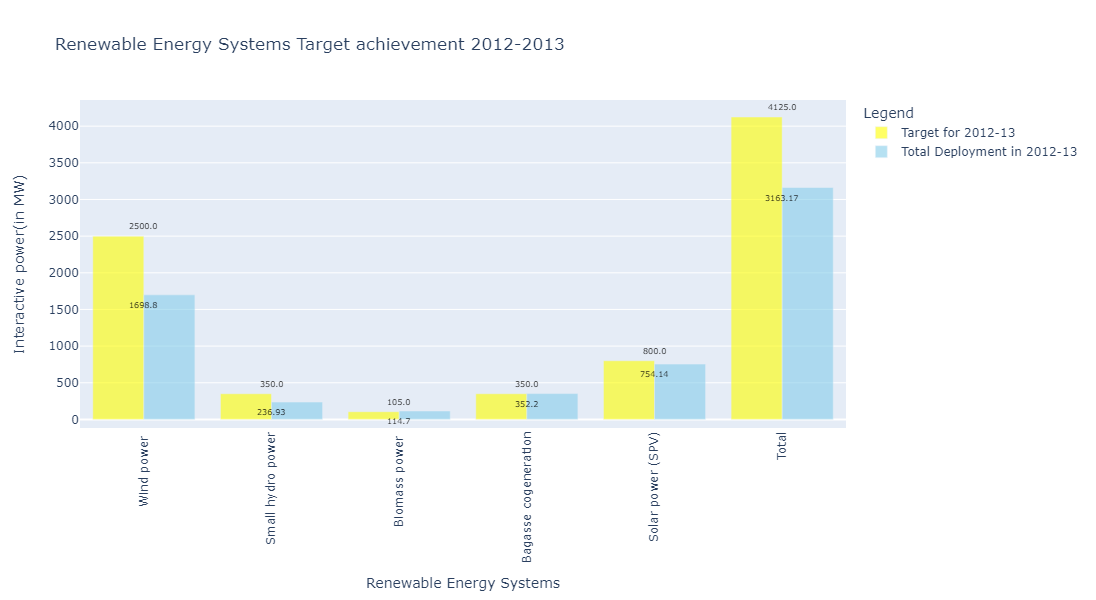

In [9]:
fig = go.Figure()

# Adding bar traces for Target for 2012-13 and Total Deployment in 2012-13
fig.add_trace(go.Bar(
    x=df['Renewable Energy Systems'],
    y=df['Target for 2012-13'],
    name='Target for 2012-13',
    marker_color='yellow',
    opacity=0.6
))

fig.add_trace(go.Bar(
    x=df['Renewable Energy Systems'],
    y=df['Total Deployment in 2012-13'],
    name='Total Deployment in 2012-13',
    marker_color='skyblue',
    opacity=0.6
))

# Adding text annotations
for index, row in df.iterrows():
    fig.add_annotation(
        x=row['Renewable Energy Systems'],
        y=row['Target for 2012-13'],
        text=str(row['Target for 2012-13']),
        showarrow=False,
        font=dict(color='black', size=8),
        yshift=10,
    )
    
    fig.add_annotation(
        x=row['Renewable Energy Systems'],
        y=row['Total Deployment in 2012-13'],
        text=str(row['Total Deployment in 2012-13']),
        showarrow=False,
        font=dict(color='black', size=8),
        yshift=-10,
    )

# Updating layout
fig.update_layout(
    title="Renewable Energy Systems Target achievement 2012-2013",
    xaxis_title="Renewable Energy Systems",
    yaxis_title="Interactive power(in MW)",
    xaxis_tickangle=-90,
    width=900,
    height=600,
    barmode='group',
    legend=dict(title="Legend", bgcolor='rgba(255, 255, 255, 0.7)')
)

fig.show()

 ### <font color='blue'>Observations </font>
1. Some renewable energy sectors, like biomass power and bagasse cogeneration, slightly exceeded their deployment targets.<br>
2. However, wind power, small hydro power, and solar power fell short of their targets.
3. This reveals variability in meeting renewable energy deployment goals among different sectors.

# State-wise Potential of Various Renewable Energy Technologies

In [10]:
potential_statewise_renewable13=pd.read_csv("data/State-wise Potential of Various Renewable Energy Technologies2013.csv")
potential_statewise_renewable22=pd.read_csv("data/State-wise Potential of Various Renewable Energy Technologies - 2022.csv")

### <font color ='green'> Why Line Plot ? </font> 
1. Line plot will the trend of rising potential and falling potential in compresensive manner.
2. Area plot will not be able to showcase fluctuations like line plots.

### Wind Power 

In [11]:
windpower13=potential_statewise_renewable13[['States/ UTs','Wind Power (MW) 2013']]
windpower22=potential_statewise_renewable22[['States/ UTs','Wind Power (MW) 2022']]

In [12]:
windpower_merged=windpower13.set_index('States/ UTs').join(windpower22.set_index('States/ UTs')).dropna().reset_index()

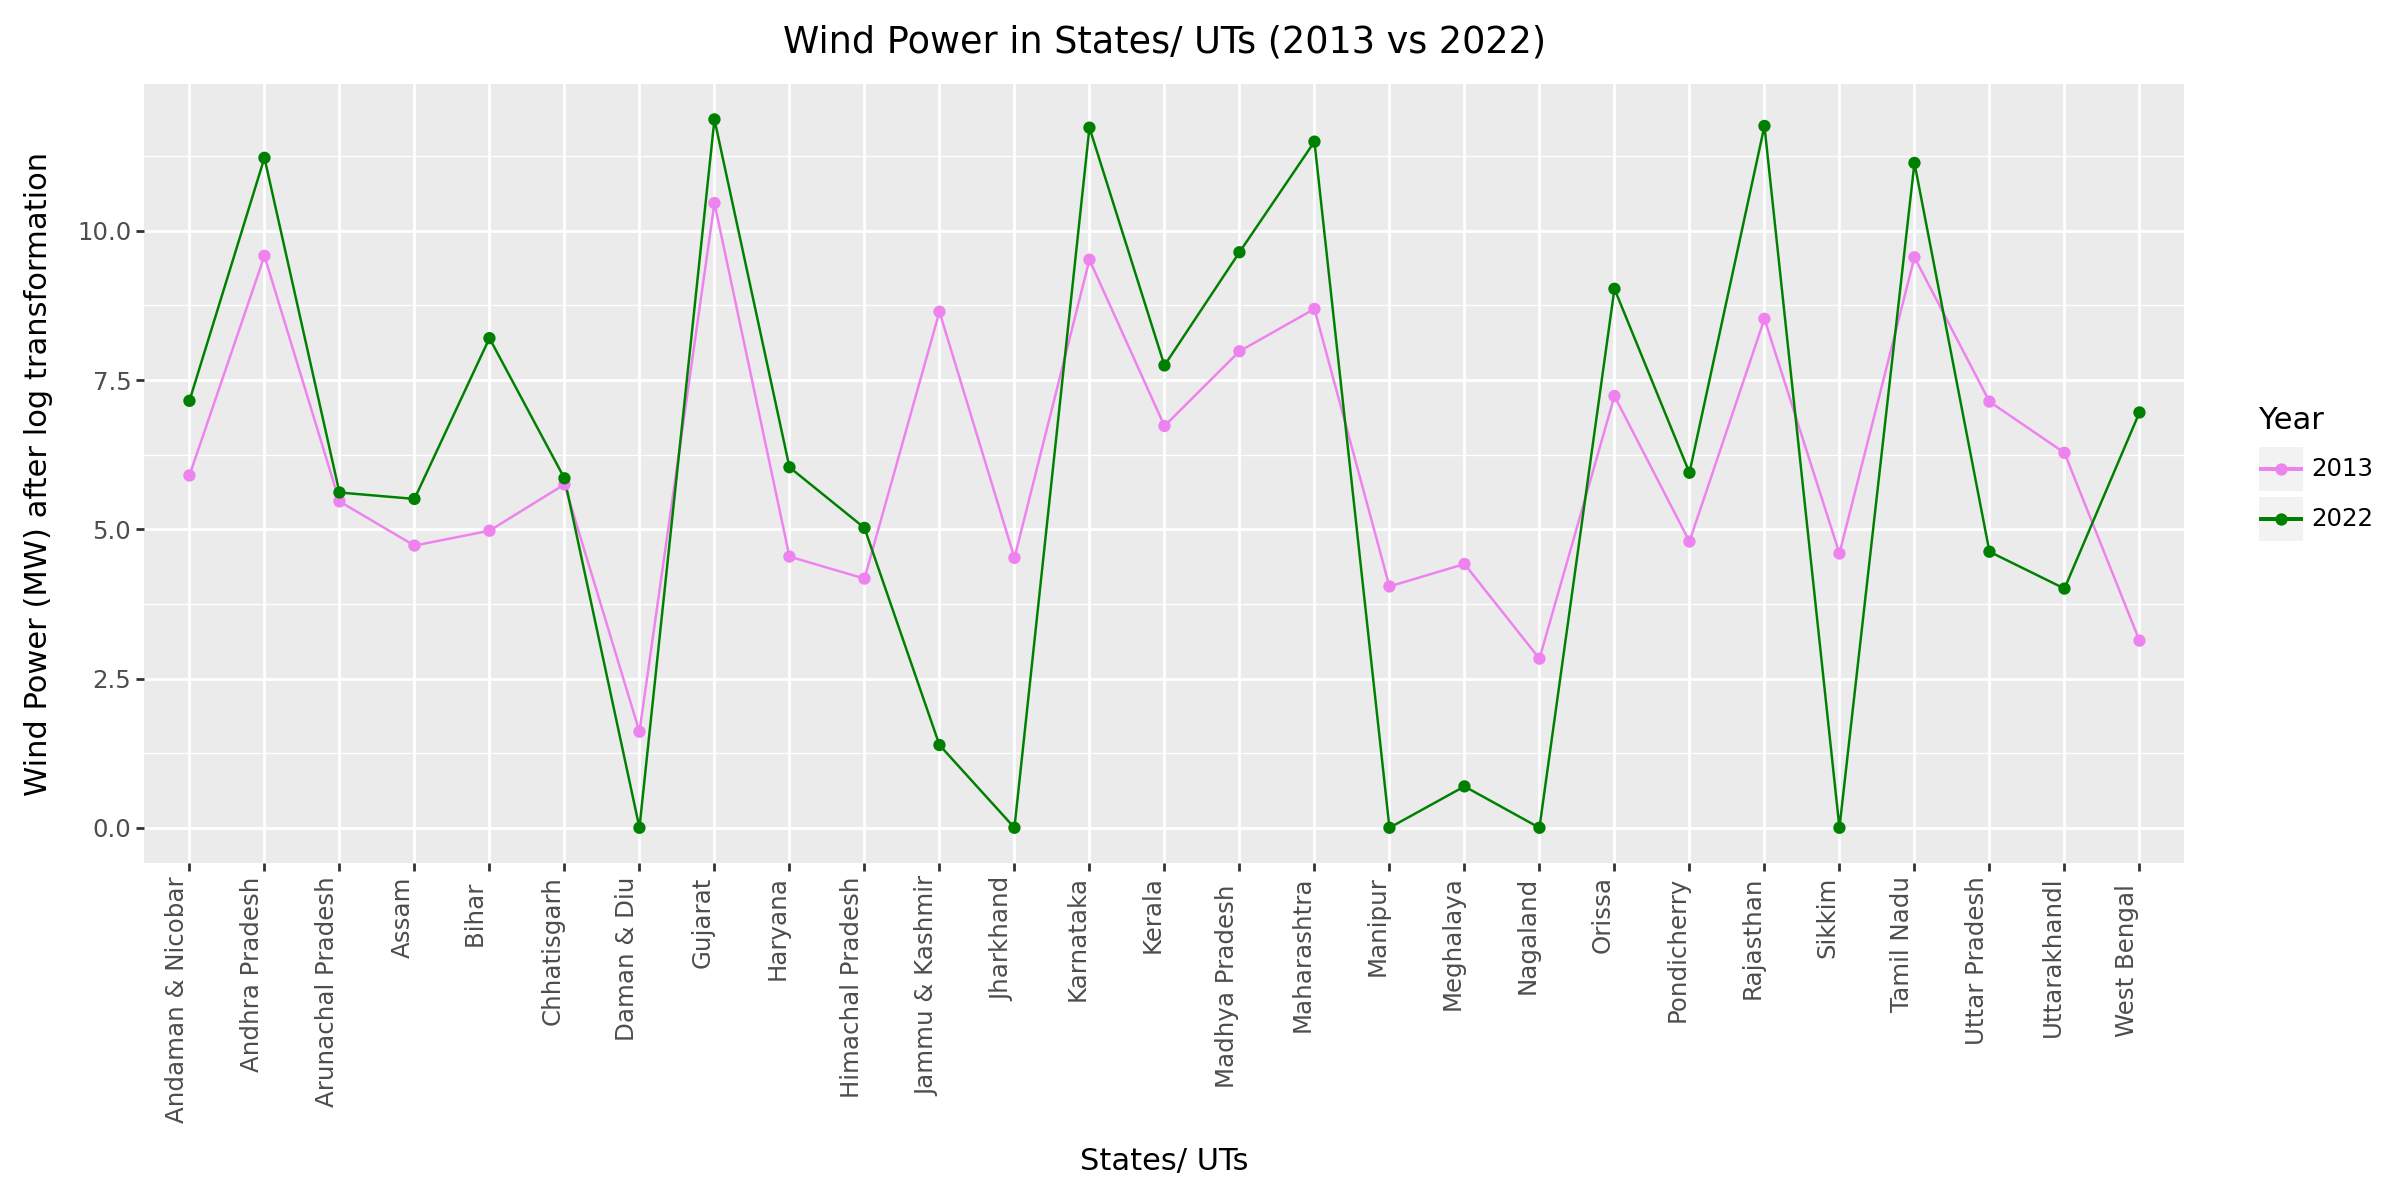

In [13]:
# Melt the DataFrame to long format
df_melted = pd.melt(windpower_merged, id_vars=['States/ UTs'], var_name='Year', value_name='Wind Power (MW)')

# Apply log transformation to represent massive variation better
df_melted['Wind Power (MW)'] = np.log(df_melted['Wind Power (MW)'] + 1)  # Adding 1 to avoid log(0)

# Plot
(ggplot(df_melted, aes(x='States/ UTs', y='Wind Power (MW)', color='Year', group='Year')) +
 geom_line() +
 geom_point() +
 theme(figure_size=(12,6),axis_text_x=element_text(rotation=90, hjust=1)) +
 labs(title='Wind Power in States/ UTs (2013 vs 2022)', x='States/ UTs', y='Wind Power (MW) after log transformation', color='Year') +
 scale_color_manual(values=['violet', 'green'], labels=['2013', '2022']) +  # Optional: set color for each year
 guides(color=guide_legend(title='Year'))  # Optional: customize legend
)


### <font color='blue'>Observations </font>
1. Over the years most of the States and UTs have increased their potential of generating Wind Power but Jharkhand , Jammu and Kashmir , Sikkim, Manipur and Meghalaya have fallen very low.
2. Uttar Pradesh and Uttrakhand have also decresed their potential over the span  of 9 years.
3. Gujrat, Andhra Pradesh, karnataka , Maharashtra and Tamil Nadu have proved to be valuable assets for harnessing wind power , with maximum potential.

### Small Hydro Power

In [14]:
hydropower13=potential_statewise_renewable13[['States/ UTs','Small Hydro Power (MW) 2013']]
hydropower22=potential_statewise_renewable22[['States/ UTs','Small Hydro Power (MW) 2022']]

In [15]:
hydropower_merged=hydropower13.set_index('States/ UTs').join(hydropower22.set_index('States/ UTs')).dropna().reset_index()

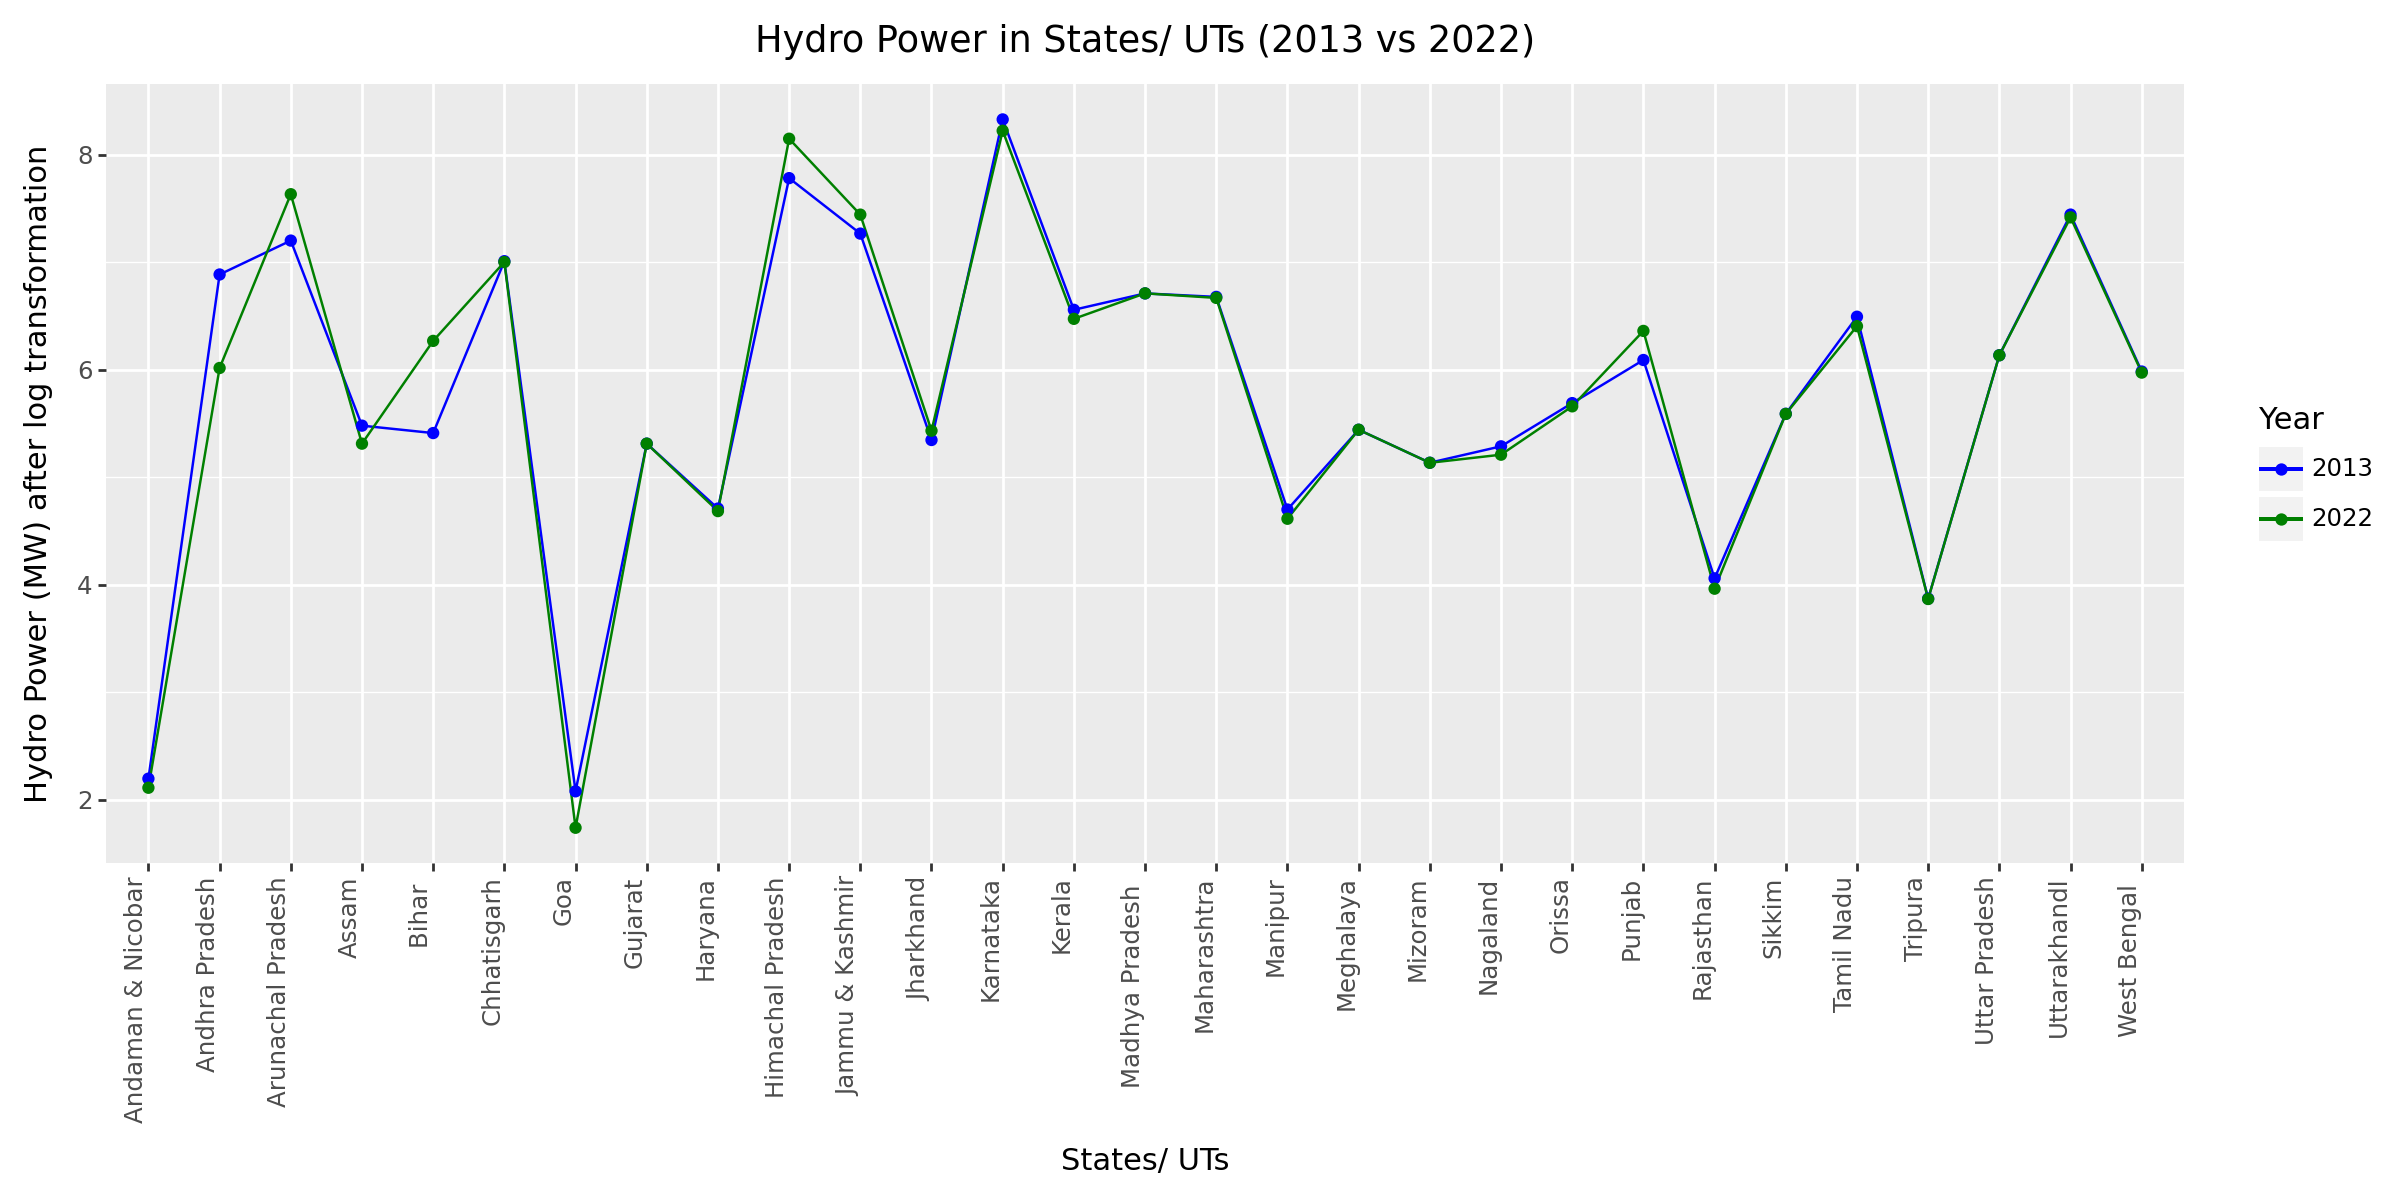

In [16]:
# Melt the DataFrame to long format
df_melted = pd.melt(hydropower_merged, id_vars=['States/ UTs'], var_name='Year', value_name='Hydro Power (MW)')

# Apply log transformation to represent massive variation better
df_melted['Hydro Power (MW)'] = np.log(df_melted['Hydro Power (MW)'] + 1)  # Adding 1 to avoid log(0)

# Plot
(ggplot(df_melted, aes(x='States/ UTs', y='Hydro Power (MW)', color='Year', group='Year')) +
 geom_line() +
 geom_point() +
 theme(figure_size=(12,6),axis_text_x=element_text(rotation=90, hjust=1)) +
 labs(title='Hydro Power in States/ UTs (2013 vs 2022)', x='States/ UTs', y='Hydro Power (MW) after log transformation', color='Year') +
 scale_color_manual(values=['blue', 'green'], labels=['2013', '2022']) +  # Optional: set color for each year
 guides(color=guide_legend(title='Year'))  # Optional: customize legend
)


### <font color='blue'>Observations </font>
1. In Andhra Pradesh over the span  of 9 years Hydro Power potential has fallen.
2. Most of the states shows little to no progress in increasing its potential.
3. Despite being coastal regions Goa and Andaman and Nicobar islands are at the bottom but since their sizes are very small compared to rest of the states, they might not be performing very bad.



### Bio-Energy - Biomass Power 

### <font color ='green'> Why Bar Plot ? </font> 
1. Since there is no change in data over the years line plot will not capture anything.
2. Bar plot can clearly showcase the indifference in data over time.

In [17]:
biopower13=potential_statewise_renewable13[['States/ UTs','Bio-Energy - Biomass Power (MW) 2013']]
biopower22=potential_statewise_renewable22[['States/ UTs','Bio-Energy - Biomass Power (MW) 2022']]

In [18]:
biopower_merged=biopower13.set_index('States/ UTs').join(biopower22.set_index('States/ UTs')).dropna().reset_index()

C:\bigdata\anaconda\Lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning:

Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it



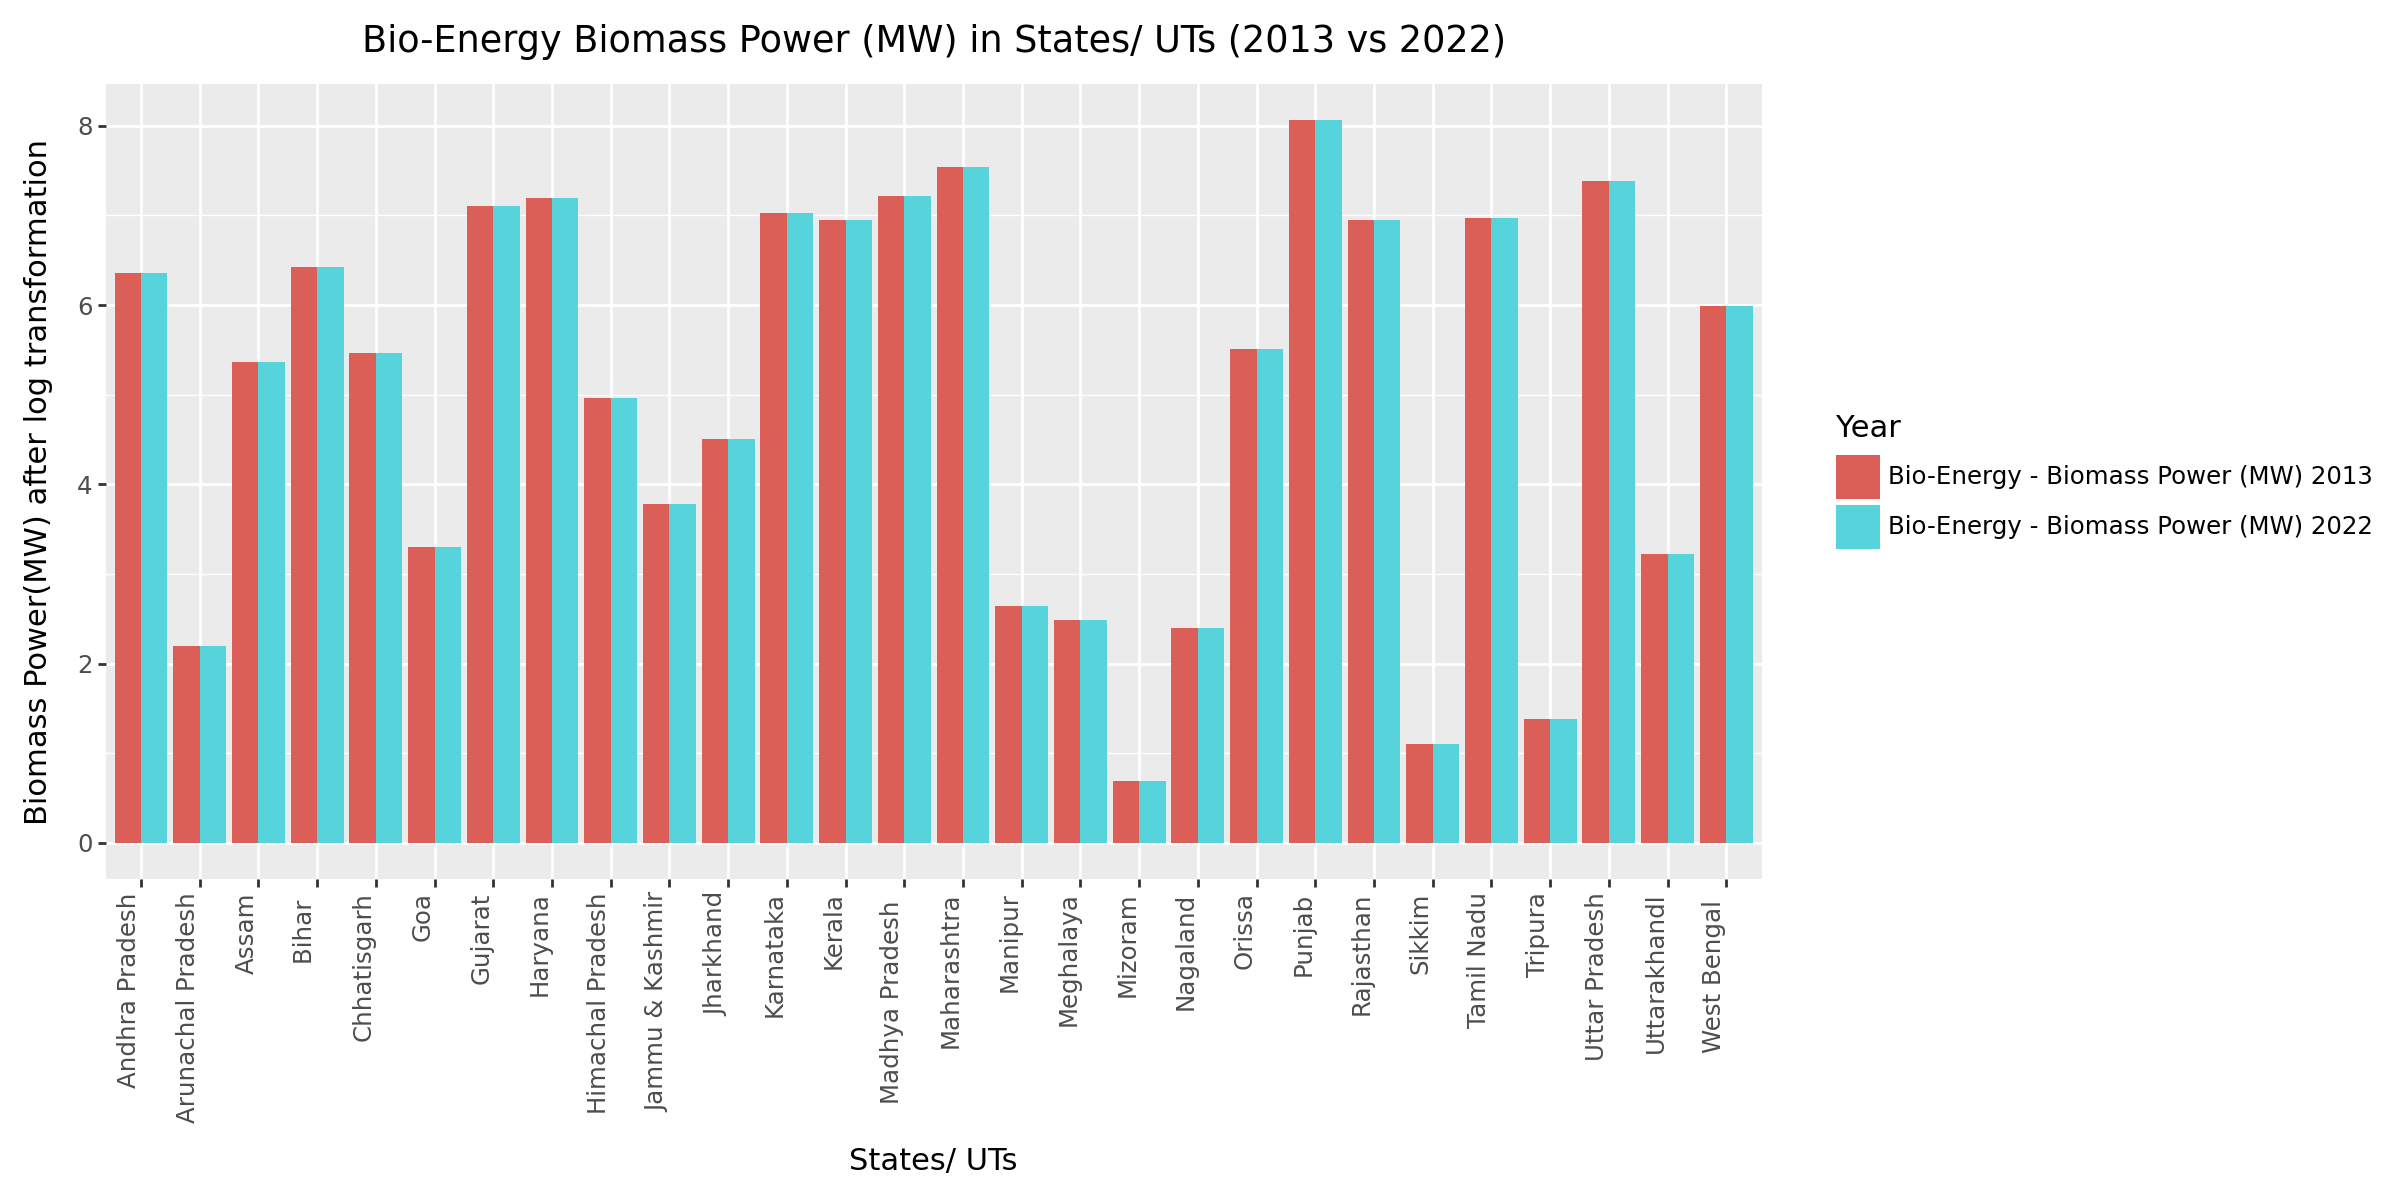

In [19]:
# Melt the DataFrame to long format
df_melted = pd.melt(biopower_merged, id_vars=['States/ UTs'], var_name='Year', value_name='Biomass Power (MW)')

# Apply log transformation to represent massive variation better
df_melted['Biomass Power (MW)'] = np.log(df_melted['Biomass Power (MW)'] + 1)  # Adding 1 to avoid log(0)

# Plot
(ggplot(df_melted, aes(x='States/ UTs', y='Biomass Power (MW)',fill='Year')) +
 geom_bar(stat='identity', position='dodge') +
 theme_gray()+
 theme(figure_size=(12,6),axis_text_x=element_text(rotation=90, hjust=1)) +
 labs(title='Bio-Energy Biomass Power (MW) in States/ UTs (2013 vs 2022)', x='States/ UTs', y='Biomass Power(MW) after log transformation', fill='Year') +
 scale_color_manual(values=['red', 'green'])  # Optional: set color for each year
)

### <font color='blue'>Observations </font>
1. Very disappointing condition here , over the span of 9 years no progress has been acheived.
2. Bio-Energy - Biomass Power, in India  has apparently reached its maxima.

### Total Renewable Energy


In [20]:
totalpower13=potential_statewise_renewable13[['States/ UTs','Total (MW) 2013']]
totalpower22=potential_statewise_renewable22[['States/ UTs','Total (MW) 2022']]

In [21]:
totalpower_merged=totalpower13.set_index('States/ UTs').join(totalpower22.set_index('States/ UTs')).dropna().reset_index()

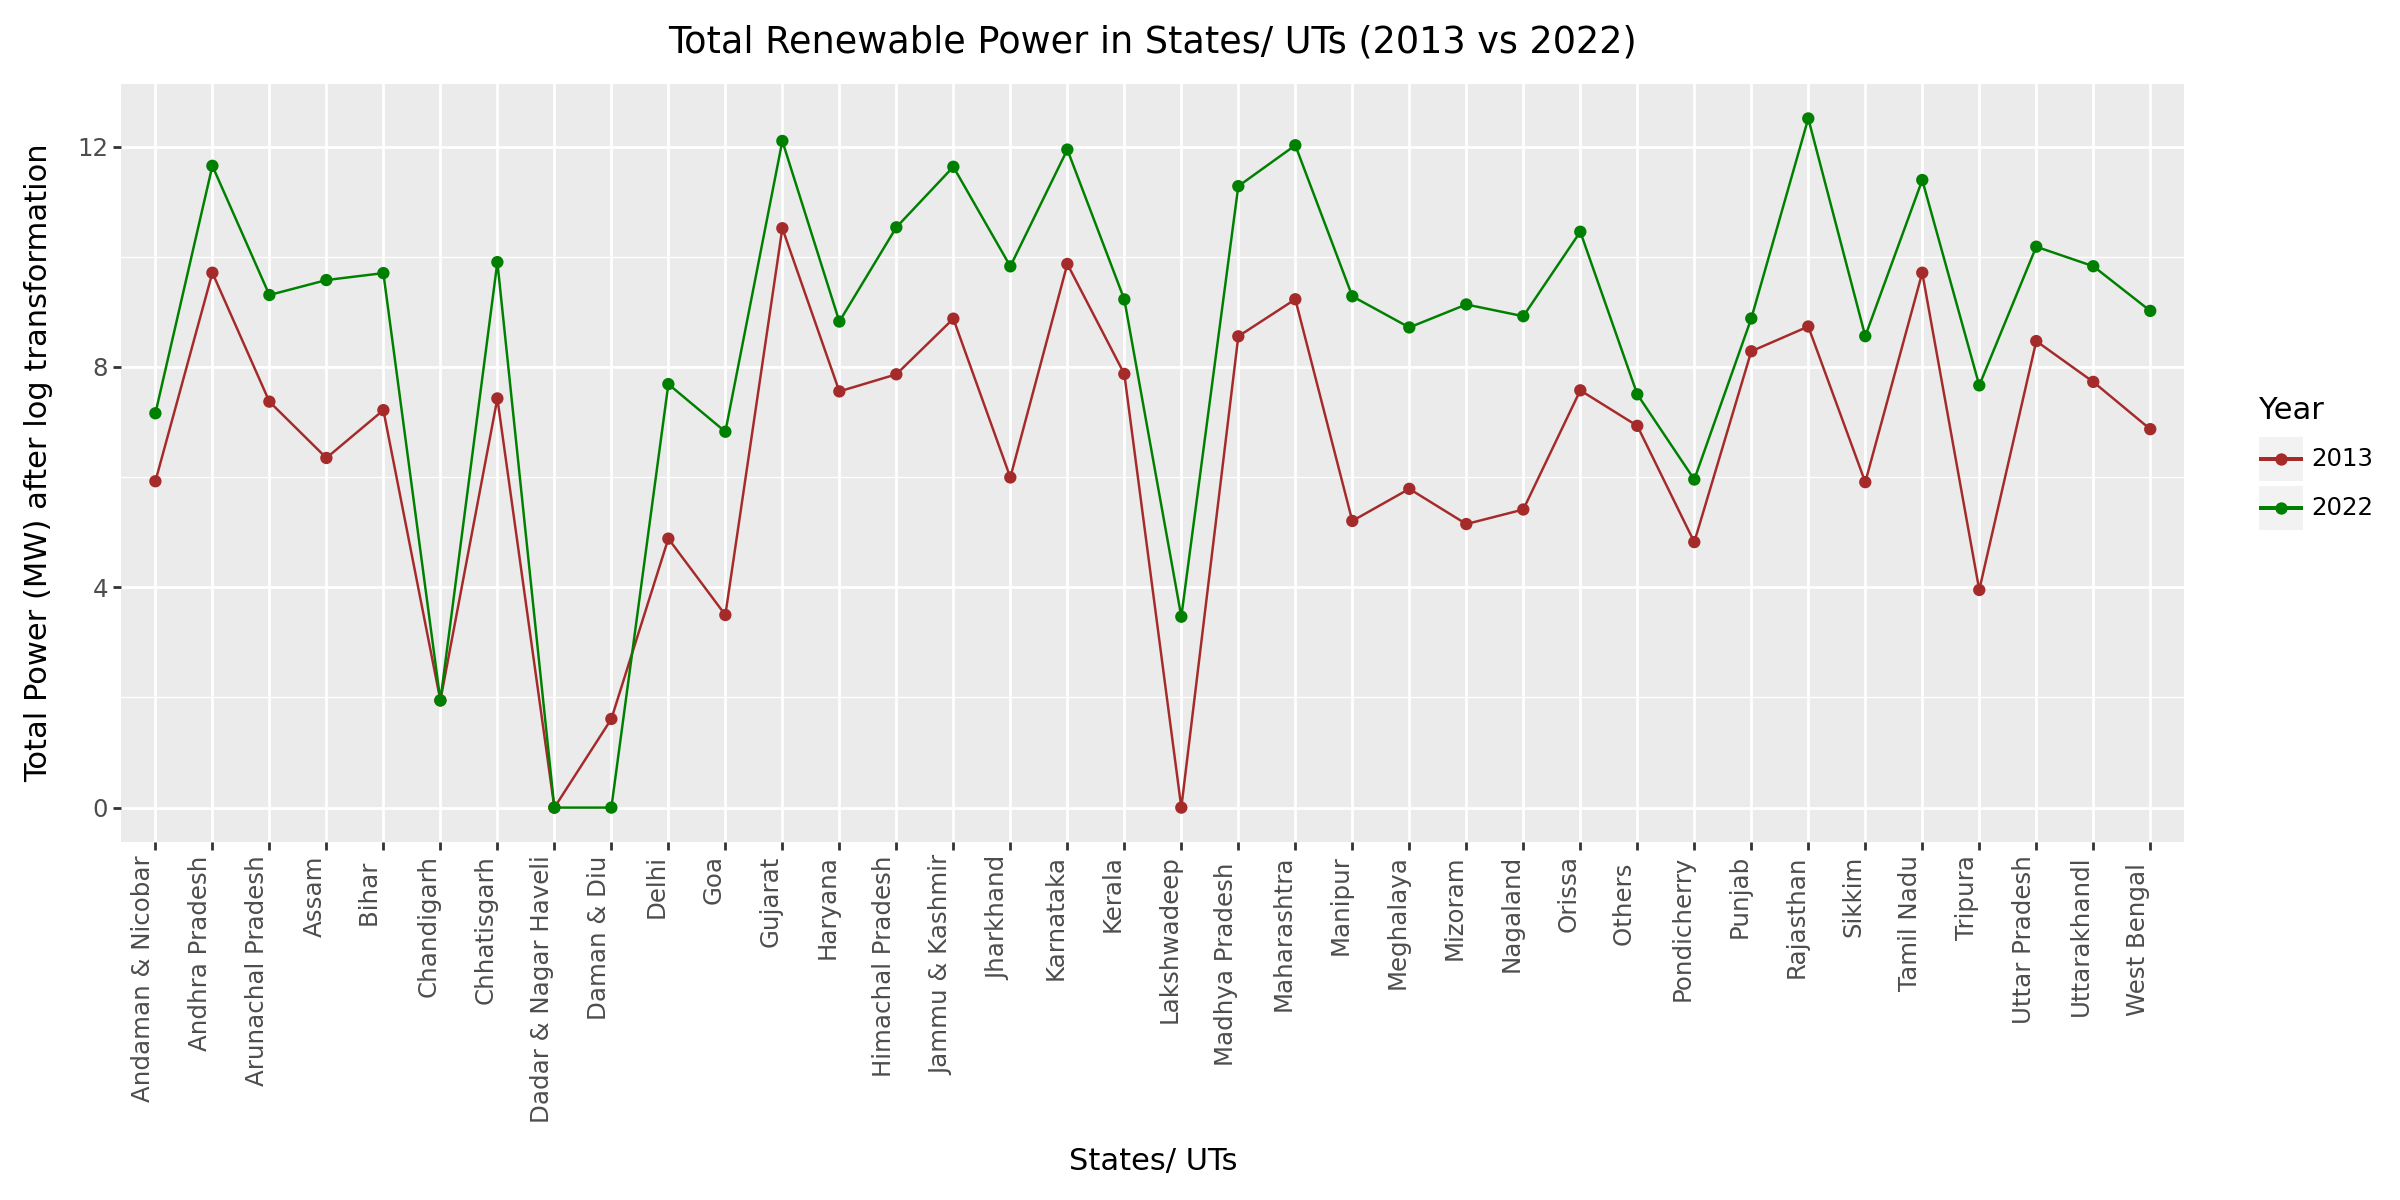

In [22]:
# Melt the DataFrame to long format
df_melted = pd.melt(totalpower_merged, id_vars=['States/ UTs'], var_name='Year', value_name='Total Power (MW)')

# Apply log transformation to represent massive variation better
df_melted['Total Power (MW)'] = np.log(df_melted['Total Power (MW)'] + 1)  # Adding 1 to avoid log(0)

# Plot
(ggplot(df_melted, aes(x='States/ UTs', y='Total Power (MW)', color='Year', group='Year')) +
 geom_line() +
 geom_point() +
 theme(figure_size=(12,6),axis_text_x=element_text(rotation=90, hjust=1)) +
 labs(title='Total Renewable Power in States/ UTs (2013 vs 2022)', x='States/ UTs', y='Total Power (MW) after log transformation', color='Year') +
 scale_color_manual(values=['brown', 'green'], labels=['2013', '2022']) +  # Optional: set color for each year
 guides(color=guide_legend(title='Year'))  # Optional: customize legend
)

### <font color='blue'>Observations </font>
1. Except for Daman and Diu UT , all the other States and UTs over the years have improved their potential in generating renewable energy,
2. Rajasthan has surpassed all the states in harnessing renewable sources of energy.
3. India has lots of potential in increasing its realiability in renewable sources of energy that will eventually help India into being self - reliant.
4. There is a lot of room for improvement in Small Hydro Power and Bio energy.

#  Number of villages electrified as on march 2012 and march 2008
Meanwhile, efforts to expand electricity access to rural areas were underway. Between 2008 and 2012, there was notable progress in village electrification rates, bringing light and opportunities to remote communities.

### <font color ='green'> Why Map  ? </font> 
1. Easy representation of which State performed better than others.
2. Easy to comprehend.

In [23]:
# Load the map of India
india_map = gpd.read_file('data/India_shape/india_st.shp')
# Load the file
df_villages_electrified=pd.read_csv("data/Number_of_villages_electrified_as_on_march_2012.csv")

df_2012=df_villages_electrified[['States/Uts','% ElercT. March 2012']]
df_2008=df_villages_electrified[['States/Uts','% ElercT. March 2008']]

# Convert 'States/Uts' column in df2 to uppercase
df_2012['States/Uts'] = df_2012['States/Uts'].str.upper()
df_2008['States/Uts'] = df_2008['States/Uts'].str.upper()

# Merge the data with the map
merged_2012 = india_map.set_index('STATE').join(df_2012.set_index('States/Uts'))
merged_2008 = india_map.set_index('STATE').join(df_2008.set_index('States/Uts'))


# centroid 
# Calculate the centroid of each polygon
merged_2012['centroid'] = merged_2012['geometry'].centroid
merged_2008['centroid'] = merged_2008['geometry'].centroid

# Extract the longitude and latitude coordinates
merged_2012['longitude'] = merged_2012['centroid'].x
merged_2012['latitude'] = merged_2012['centroid'].y
# Extract the longitude and latitude coordinates
merged_2008['longitude'] = merged_2008['centroid'].x
merged_2008['latitude'] = merged_2008['centroid'].y

C:\Users\Ankita Anand\AppData\Local\Temp\ipykernel_24668\203920941.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ankita Anand\AppData\Local\Temp\ipykernel_24668\203920941.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\bigdata\anaconda\Lib\site-packages\plotnine\positions\position.py:232: PlotnineWarning:

position_dodge requires non-overlapping x intervals

C:\bigdata\anaconda\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning:

geom_text : Removed 7 rows containing missing values.



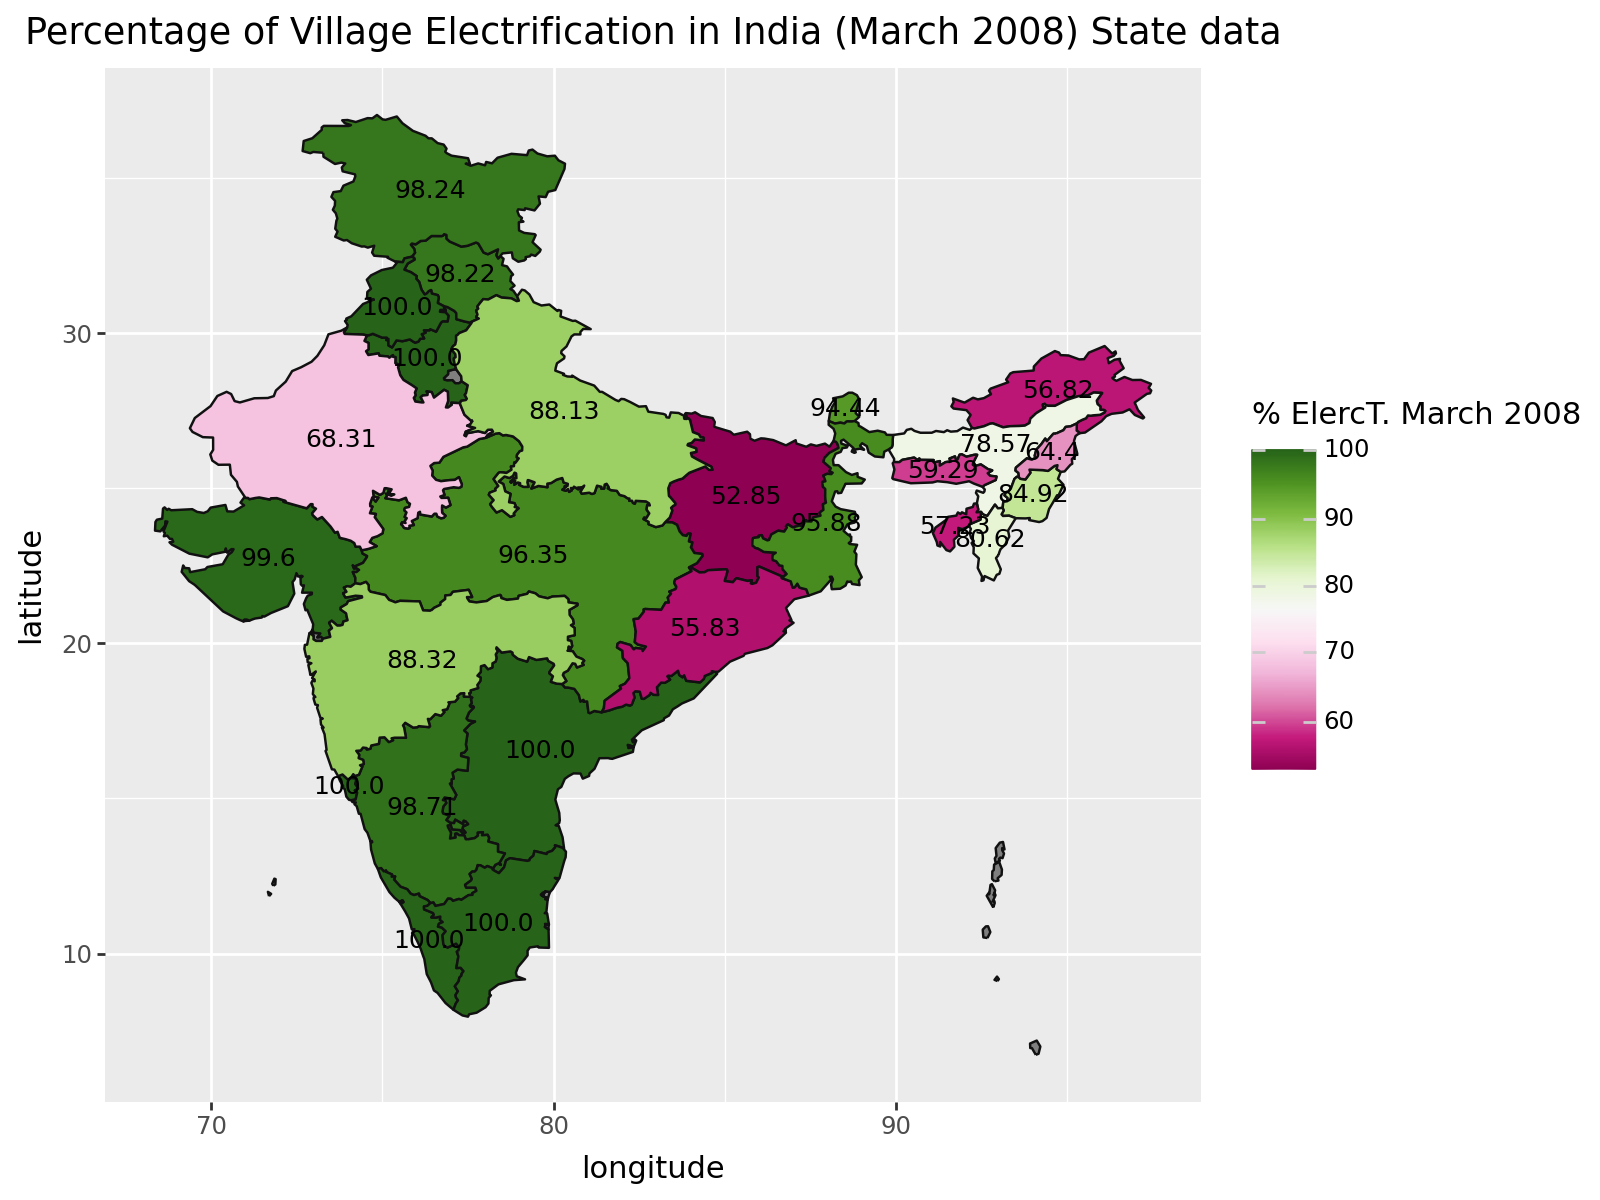

C:\bigdata\anaconda\Lib\site-packages\plotnine\positions\position.py:232: PlotnineWarning:

position_dodge requires non-overlapping x intervals

C:\bigdata\anaconda\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning:

geom_text : Removed 7 rows containing missing values.



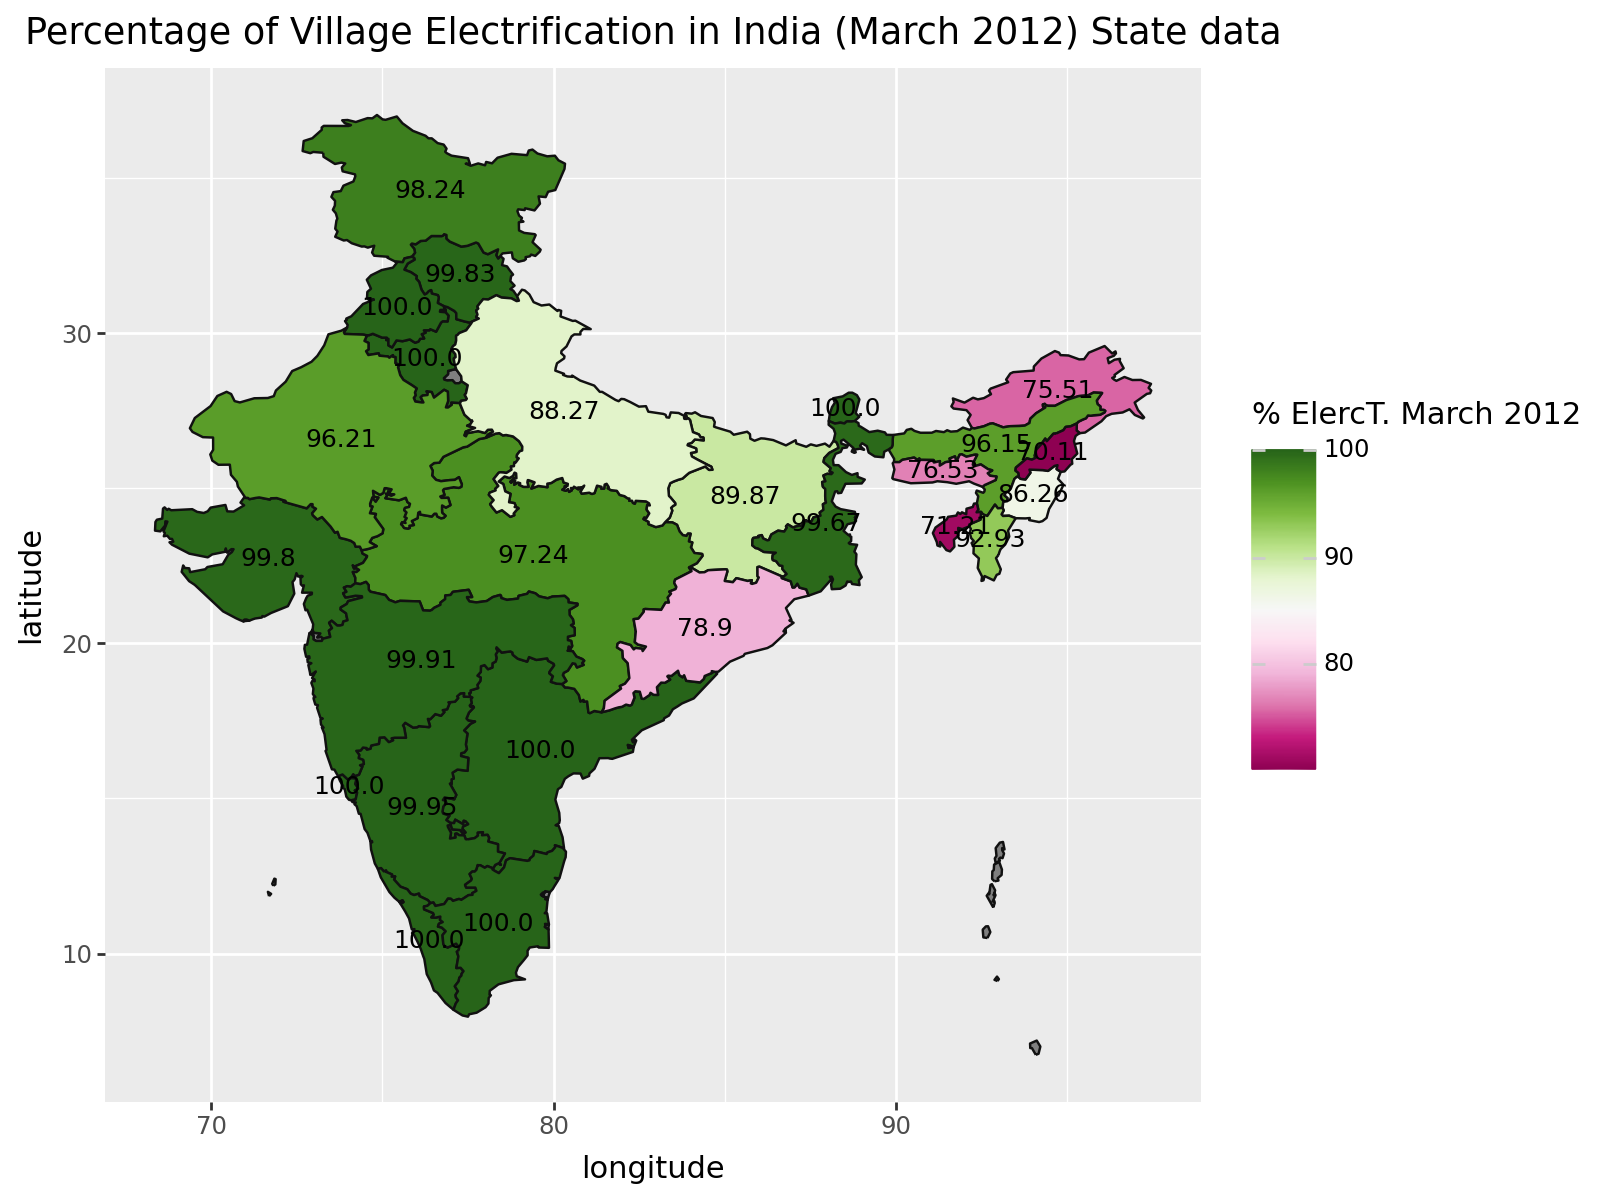

In [24]:
chart12 = ggplot(data=merged_2012, mapping=aes(fill="% ElercT. March 2012"))
map_proj = geom_map()
# Add labels showing percentage of village electrification for each state
labels12 =  geom_text(aes(x='longitude', y='latitude', label='% ElercT. March 2012'), size=9, position=position_dodge(width=1.0)) 
title12= labs(title="Percentage of Village Electrification in India (March 2012) State data")
theme_details = theme(figure_size=(8,6))
colormap = scale_fill_cmap(cmap_name="PiYG")
electrified_states_12 = chart12 + map_proj +title12+ labels12 + theme_details + colormap

chart08 = ggplot(data=merged_2008, mapping=aes(fill="% ElercT. March 2008"))
# Add labels showing percentage of village electrification for each state
labels08 =  geom_text(aes(x='longitude', y='latitude', label='% ElercT. March 2008'), size=9, position=position_dodge(width=1.0)) 
title08= labs(title="Percentage of Village Electrification in India (March 2008) State data")
electrified_states_08 = chart08 + map_proj +title08+ labels08 + theme_details + colormap

electrified_states_08.show()  # Percentage of Village Electrification in India (March 2008) State data

electrified_states_12.show()   #Percentage of Village Electrification in India (March 2012) State data

### <font color='blue'>Observations </font>
1. Massive Improvement is seen between the span of 4  years in Rajasthan and Bihar.
2. Rajasthan leading in the generation of renewable energy do have some role to play here, within the span of 4 years it is able to electrified most of its villages.
3. South India is leading with most of its states at 100% , showcasing that development in southern India is going with faster speed than North India.
4. North Eastern States are also at good percentages.
5. Jharkhand is lagging behind all the other states of India.

# Net generation of electricity (owned_units) from 2009-10 to 2013-14

In [25]:
Net_generation_of_electricity=pd.read_csv("data/Net_generation_of_electricity(owned_units)from2009-10to2013-14.csv")

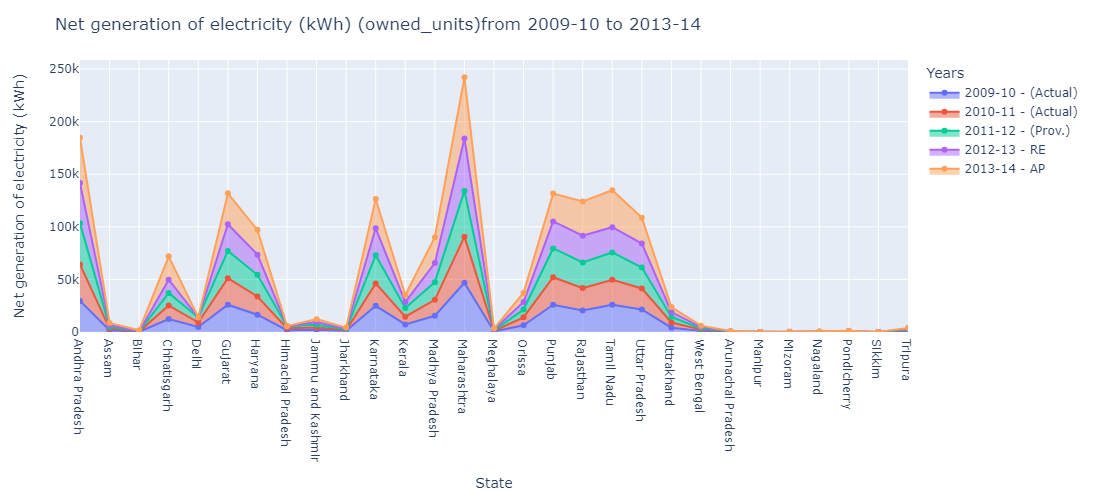

In [26]:
fig = px.area(Net_generation_of_electricity[:29], x='State', y=['2009-10 - (Actual)', '2010-11 - (Actual)',
       '2011-12 - (Prov.)', '2012-13 - RE', '2013-14 - AP'],markers=True)

# Add labels
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Net generation of electricity (kWh)',
    title='Net generation of electricity (kWh) (owned_units)from 2009-10 to 2013-14',
    width=1000,  # Specify the width of the plot
    height=500,  # Specify the height of the plot
    legend_title_text='Years'  # Change legend title to 'Years'
)

fig.show()

### <font color ='green'> Why Area Plot ? </font> 
1. Visualizing Trends: An area plot provides a clear visualization of trends over the specified period.<br>
2. Comparing States: The stacked nature of the area plot allows for easy comparison between states

### <font color='blue'>Observations </font>
1. Maharashtra is leading in the production of Electricity over the span of 5 years.
2. Punjab and Gujrat had highest per capita consumption and here they are also taking great part in generating Electricity.
3. All the North Eastern States, Bihar and Jharkhand is contributing almost nothing over the span of 5 years.
4. Over the years generations of electricity by states has increased only.

### Net generation of electricity (kWh) (owned_units) in  2013-14
In response, India ramped up efforts to boost domestic electricity generation capacity. Various states invested in expanding their power infrastructure, tapping into both conventional and renewable energy sources to meet growing demand.

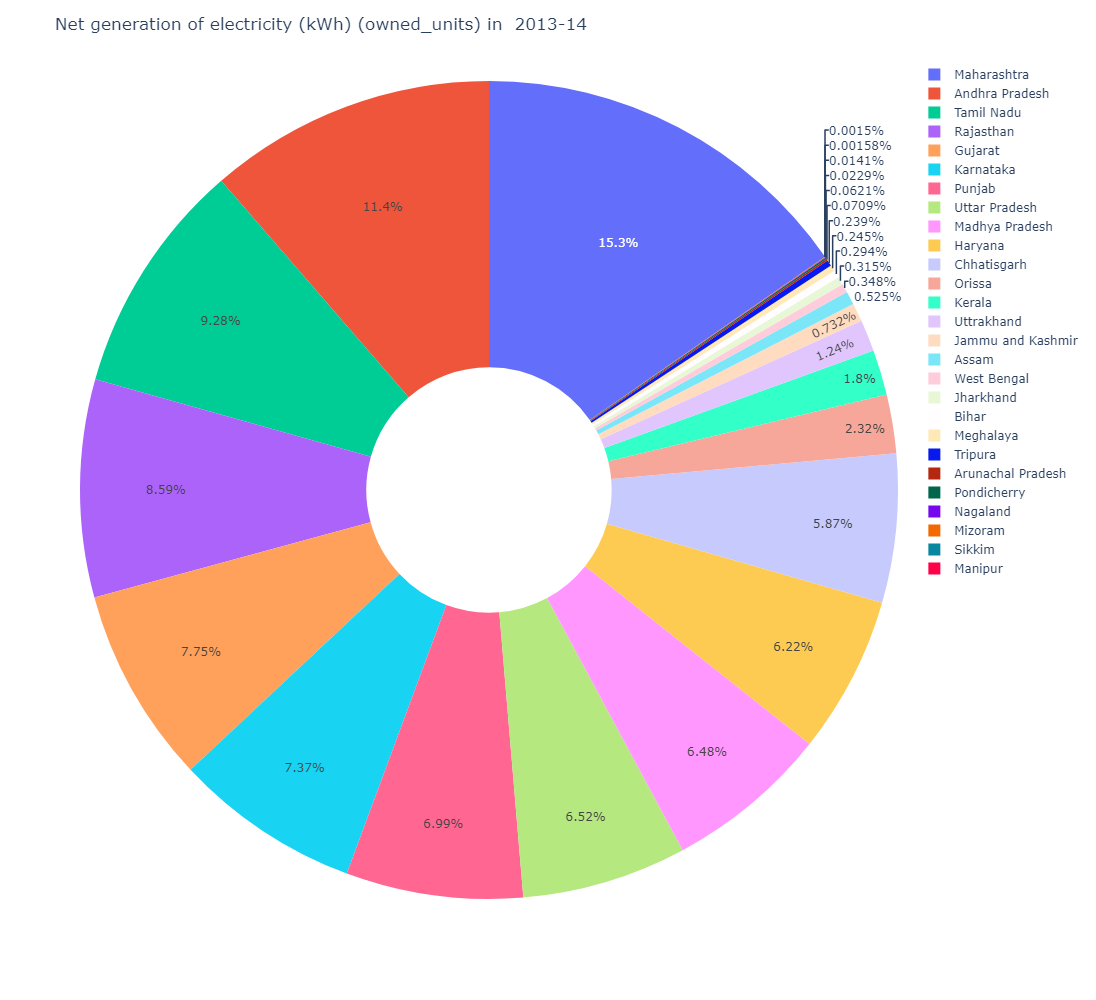

In [27]:
states_2014_data=Net_generation_of_electricity[:29]
# Create a pie chart for the year '2013-14 - AP'
pie_fig = px.pie(values=states_2014_data['2013-14 - AP'], names=states_2014_data['State']).update_traces(hole=.3, hoverinfo="label+percent+name")
pie_fig.update_layout(
    
    title='Net generation of electricity (kWh) (owned_units) in  2013-14',
    height=1000,
    width=1000
)
# Show the pie chart
pie_fig.show()

### <font color ='green'> Why Pie Chart ? </font>
1. Pie Chart helps in quickly identifying leading contributers.
2. It summarises the data in consise manner.

### <font color='blue'>Observations </font>
1. Maharashtra , Andhra Pradesh and Tamil Nadu are the major contributers in the Electricity generation area of India in 2013-14.
2. Rajasthan has performed relatively very well in 2013-14 and this is the direct effect of it being the leading state in the generation of renewable sources of energy.

#  Interactive Pie Chart for Distribution of Electricity Consumption by Category

In [28]:
total_sectorwise_sales=pd.read_csv("data/share of different sector in electricity sales total.csv")

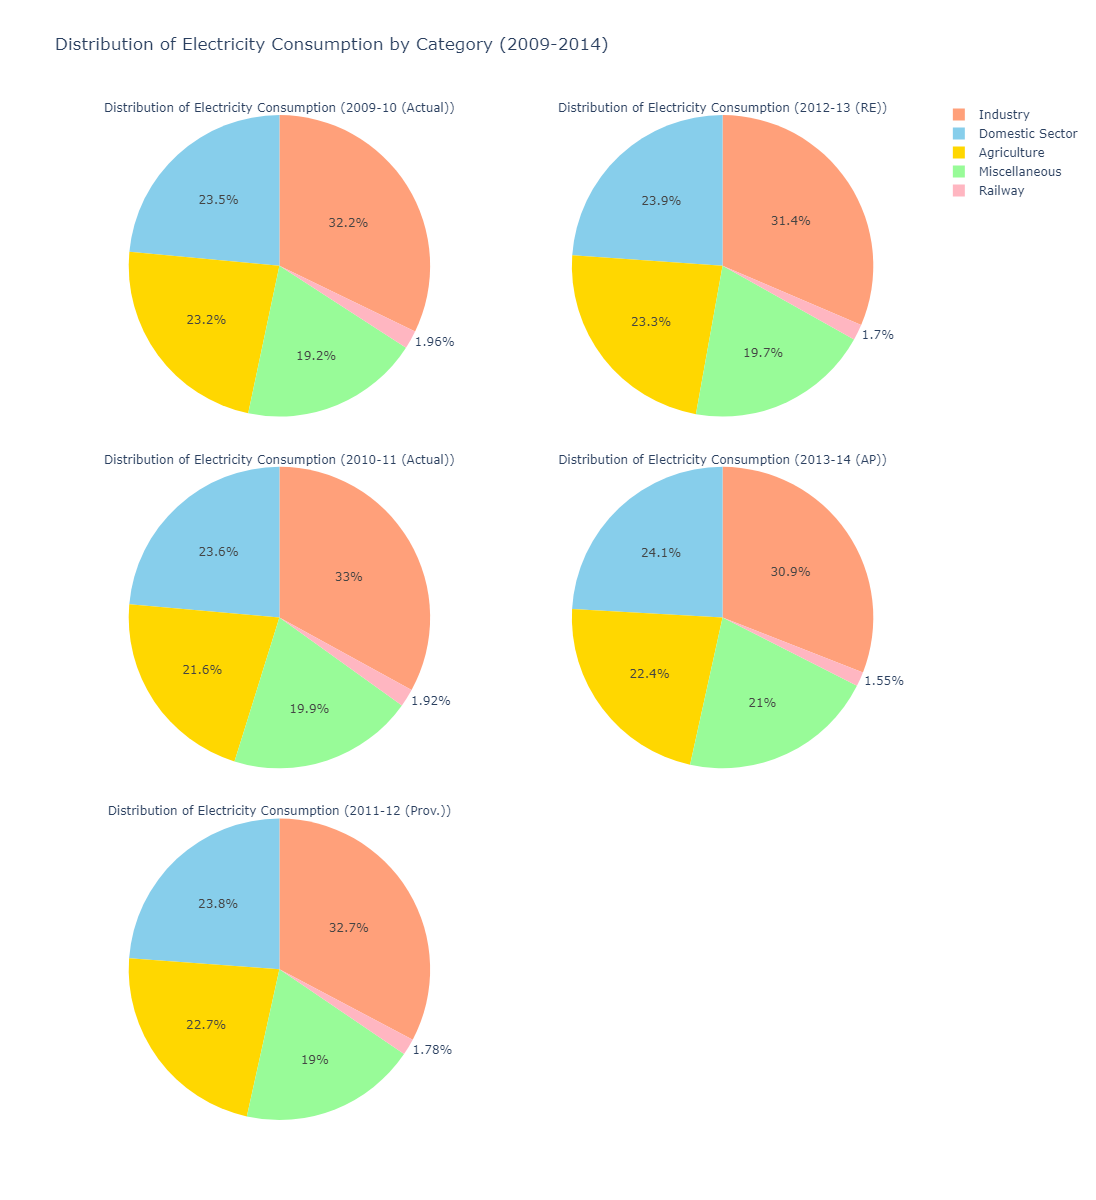

In [29]:
# Arrange the pie charts in a 3x2 grid
fig = go.Figure()
# Define custom color palette
colors =[
        '#FFB6C1', # Light Pink
        '#FFD700', # Gold
        '#87CEEB', # Sky Blue
        '#FFA07A', # Light Salmon
        '#98FB98', # Pale Green
        '#ADD8E6', # Light Blue
        '#FFC0CB', # Pink
        '#20B2AA', # Light Sea Green
        '#FFDAB9', # Peachpuff
        '#FAFAD2'  # Light Goldenrod Yellow
]

for i, year in enumerate(total_sectorwise_sales.columns[1:]):
    fig.add_trace(
        go.Pie(
            labels=total_sectorwise_sales['Categories'],
            values=total_sectorwise_sales[year],
            name=year,
            domain={'row': i % 3, 'column': i // 3},
            title=f'Distribution of Electricity Consumption ({year})',
            marker=dict(colors=colors)
        )
    )

fig.update_layout(
    grid={'rows': 3, 'columns': 2},
    title='Distribution of Electricity Consumption by Category (2009-2014)',
    height=1200,
    width=1000
)

fig.show()

### <font color ='green'> Why Pie Chart ? </font>
1. Pie Chart helps in quickly identifying leading sector of consumption of Electricity in India over years.
2. It summarises the data in consise manner for quick and easy interpretations.

### <font color='blue'>Observations </font>
1. Consumption of electricity in industrial sector is maximum in all the years over all the sectors.
2. Slight fluctuations is seen in all the sectors in terms of their percentage of consumption over the years.
3. In India Top three leading sorces of consumption of electricity are Industries, Domestic Sector( household ) and Agriculture.
4. Which emphasises that India is a developing country where agriculture and industries exist together as major sector of consumption.

# i) Share of industry sector in total electricity sales from 2009-10 to 2013-14

In [30]:
#This dataset represents the share of the industry sector in total electricity sales across
#different states of India over the years 2009-10 to 2013-14

industry_share=pd.read_csv("data/Share of industry sector in total electricity sales from 2009-10 to 2013-14.csv")

### Heatmap

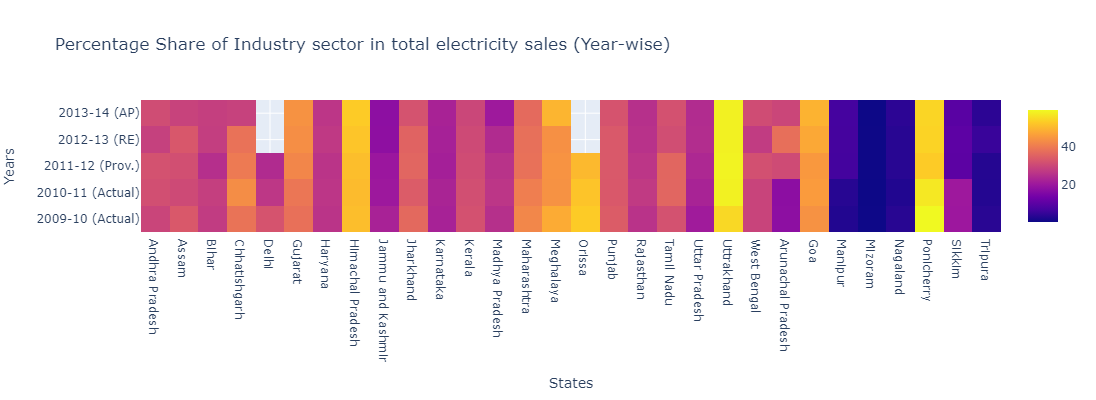

In [31]:
years = ["2009-10 (Actual)", "2010-11 (Actual)", "2011-12 (Prov.)", "2012-13 (RE)", "2013-14 (AP)"]

heatmap_data = []
for year in years:
    heatmap_data.append(industry_share[year])

fig = go.Figure(data=go.Heatmap(
        z=heatmap_data,
        x=industry_share["States"],
        y=years,
        hoverongaps = False))
fig.update_layout(
    title='Percentage Share of Industry sector in total electricity sales (Year-wise)',
    xaxis_nticks=len(industry_share["States"]),
    yaxis_title='Years',
    xaxis_title='States',
    height=400, width=1100
)
fig.show()

### <font color ='green'> Why Heatmap ? </font>
1. Heatmaps provide a visual representation of data trends over time. By using color gradients to represent different values, viewers can easily identify patterns and changes in the share of one sector consumption of electricity over years.
2. State wise data is very easy to comprehend over multiple years together.

### Plotting On India's Map

In [ ]:
# Load the map of India
india_map = gpd.read_file('data/India_shape/india_st.shp')

# Merge the data with the map
industry_share['States'] = industry_share['States'].str.upper()
merged_data = india_map.merge(industry_share, how='left', left_on='STATE', right_on='States')

# Create a list to hold data for each year
data = []
for year in ['2009-10 (Actual)', '2010-11 (Actual)', '2011-12 (Prov.)', '2012-13 (RE)', '2013-14 (AP)']:
    data.append(merged_data.assign(year=year, value=merged_data[year]))

# Combine data for all years into a single DataFrame
combined_data = pd.concat(data)

# Plot the data on a single map
fig = px.choropleth(
    combined_data,
    geojson=combined_data.geometry,
    locations=combined_data.index,
    color='value',
    hover_name='STATE',
    projection='mercator',
    animation_frame='year',
    title='Percentage Share of Industry sector in total electricity sales (Year-wise)',
    labels={'value': 'Percentage Share of Industry sector'},
    color_continuous_scale="Magma",
    range_color=[0, 100]
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)

fig.show()


### <font color ='green'> Why India's Stacked Map ? </font>
1. It provide nice little animation effect to see since this is an interaction plot, by clicking on play button we can see change over years in consumption of electricity by industries.
2. Quickly can Identify Maximum percentage of consumption having States.


### <font color='blue'>Observations </font>
1. Himachal Pradesh,Orissa,Uttrakhand and in UT Pondicherry are the major States and UT that have more than 50% of their electricity requirement being used by industries.
2. This shows rapid industrilisation of these states.
3. North - Eastern States are very far behind which shows the potential areas where India can expand industrilisation.


# ii) Share of agriculture sector in total electricity sales from 2009-10 to 2013-14

In [33]:
agriculture_share=pd.read_csv("data/Share of agriculture sector in total electricity sales from 2009-10 to 2013-14.csv")

### Heatmap

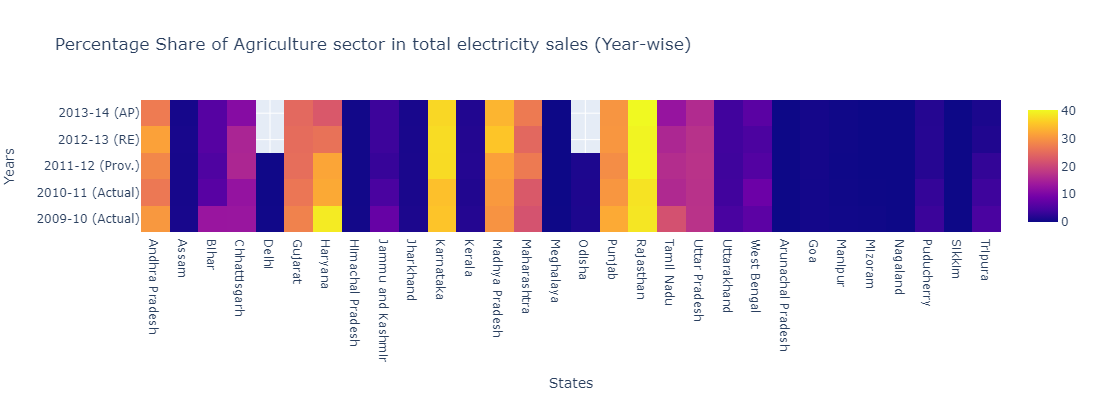

In [34]:
years = ["2009-10 (Actual)", "2010-11 (Actual)", "2011-12 (Prov.)", "2012-13 (RE)", "2013-14 (AP)"]

heatmap_data = []
for year in years:
    heatmap_data.append(agriculture_share[year])

fig = go.Figure(data=go.Heatmap(
        z=heatmap_data,
        x=agriculture_share["States"],
        y=years,
        hoverongaps = False))
fig.update_layout(
    title='Percentage Share of Agriculture sector in total electricity sales (Year-wise)',
    xaxis_nticks=len(agriculture_share["States"]),
    yaxis_title='Years',
    xaxis_title='States',
    height=400, width=1100
)
fig.show()

### Plotting On India's Map

In [ ]:
# Load the map of India
india_map = gpd.read_file('data/India_shape/india_st.shp')

# Merge the data with the map
agriculture_share['States'] = agriculture_share['States'].str.upper()
merged_data = india_map.merge(agriculture_share, how='left', left_on='STATE', right_on='States')

# Create a list to hold data for each year
data = []
for year in ['2009-10 (Actual)', '2010-11 (Actual)', '2011-12 (Prov.)', '2012-13 (RE)', '2013-14 (AP)']:
    data.append(merged_data.assign(year=year, value=merged_data[year]))

# Combine data for all years into a single DataFrame
combined_data = pd.concat(data)

# Plot the data on a single map
fig = px.choropleth(
    combined_data,
    geojson=combined_data.geometry,
    locations=combined_data.index,
    color='value',
    hover_name='STATE',
    projection='mercator',
    animation_frame='year',
    title='Percentage Share of Agriculture Sector in total electricity sales (Year-wise)',
    labels={'value': 'Percentage Share of Agriculture sector'},
    color_continuous_scale="Magma",
    range_color=[0, 100]
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=700, width=900)

fig.show()


### <font color ='green'> Why India's Stacked Map ? </font>
1. It provide nice little animation effect to see since this is an interaction plot, by clicking on play button we can see change over years in consumption of electricity by Agriculture sector in states.
2. Quickly can Identify Maximum percentage of consumption having States.

### <font color='blue'>Observations </font>
1. None of the states have more than 50% of its electricity consumption being done by agriculture alone.
2. This shows declining of agriculture sector in India.
3. Rajasthan has highest percentage of ~ 40%  among all other states, and over the years it has been to maintain that.
4. Haryana over the years has fallen in their consumption of total electricity by Agriculture alone.
5. Here too , North Eastern States and Bihar , Jharkhand etc. have very low electricity consumption which might be the direct result of still using manual forms of water irrigation systems in these states, which showcase poor infrastructure and development as compared to other states.

# iii) Share of domestic sector in total electricity sales from 2009-10 to 2013-14

In [36]:
domestic_share=pd.read_csv("data/Share of domestic sector in total electricity sales from 2009-10 to 2013-14.csv")

### Heatmap

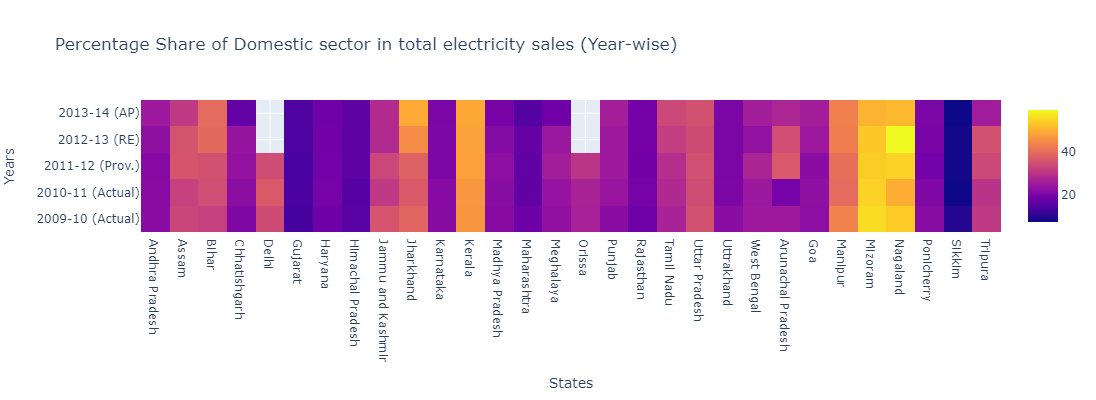

In [37]:
years = ["2009-10 (Actual)", "2010-11 (Actual)", "2011-12 (Prov.)", "2012-13 (RE)", "2013-14 (AP)"]

heatmap_data = []
for year in years:
    heatmap_data.append(domestic_share[year])

fig = go.Figure(data=go.Heatmap(
        z=heatmap_data,
        x=domestic_share["States"],
        y=years,
        hoverongaps = False))
fig.update_layout(
    title='Percentage Share of Domestic sector in total electricity sales (Year-wise)',
    xaxis_nticks=len(domestic_share["States"]),
    yaxis_title='Years',
    xaxis_title='States',
    height=400, width=1100
)
fig.show()

### Plotting On India's Map

In [ ]:
# Load the map of India
india_map = gpd.read_file('data/India_shape/india_st.shp')

# Merge the data with the map
domestic_share['States'] = domestic_share['States'].str.upper()
merged_data = india_map.merge(domestic_share, how='left', left_on='STATE', right_on='States')

# Create a list to hold data for each year
data = []
for year in ['2009-10 (Actual)', '2010-11 (Actual)', '2011-12 (Prov.)', '2012-13 (RE)', '2013-14 (AP)']:
    data.append(merged_data.assign(year=year, value=merged_data[year]))

# Combine data for all years into a single DataFrame
combined_data = pd.concat(data)

# Plot the data on a single map
fig = px.choropleth(
    combined_data,
    geojson=combined_data.geometry,
    locations=combined_data.index,
    color='value',
    hover_name='STATE',
    projection='mercator',
    animation_frame='year',
    title='Percentage Share of Domestic Sector in total electricity sales (Year-wise)',
    labels={'value': 'Percentage Share of Domestic sector'},
    color_continuous_scale="Magma",
    range_color=[0, 100]
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)

fig.show()


### <font color ='green'> Why India's Stacked Map ? </font>
1. It provide nice little animation effect to see since this is an interaction plot, by clicking on play button we can see change over years in consumption of electricity by Domestic Sector in states.
2. Quickly can Identify Maximum percentage of consumption having States.

### <font color='blue'>Observations </font>
1. North- Eastern States like Manipur, Mizoram, and Nagaland have major consumption of electricity in domestic(household) sector.
2. Which indicate the possibility of expensive rate of electricity there because of whichh they are not able to use the provided electricity for agriculture purposes.
3. Gujarat , Haryana, Himachal Pradesh and Maharashtra have minimum part of their consumption coming from domestic sector which indicate their advancement in development and industriliasation.

# iv) Share of Railway sector in total electricity sales from 2009-10 to 2013-14

In [39]:
railway_share=pd.read_csv("data/Share of railway traction in total electricity sales from 2009-10 to 2013-14.csv")

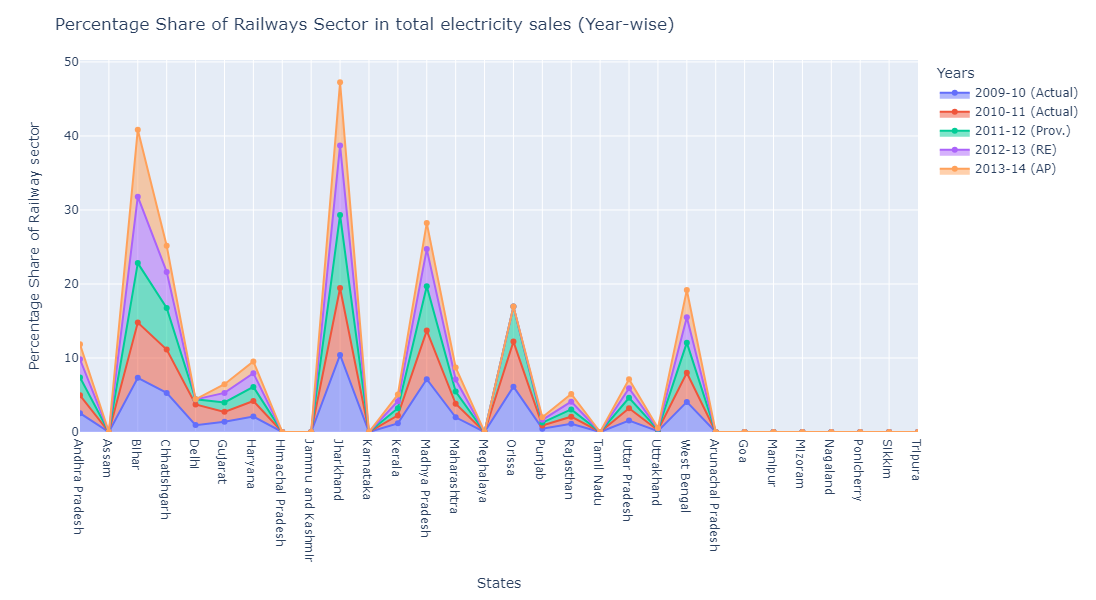

In [40]:
fig = px.area(railway_share, x='States', y=['2009-10 (Actual)', '2010-11 (Actual)', '2011-12 (Prov.)', '2012-13 (RE)', '2013-14 (AP)'],markers=True)

# Add labels
fig.update_layout(
    xaxis_title='States',
    yaxis_title='Percentage Share of Railway sector',
    title="Percentage Share of Railways Sector in total electricity sales (Year-wise)",
    width=1100,  # Specify the width of the plot
    height=600,  # Specify the height of the plot
    legend_title_text='Years'  # Change legend title to 'Years'
)

fig.show()

### <font color ='green'> Why Area Plot ? </font>
1. Since the total percentages of most of the states are very low , the contrast might not be that obvious in the kinds of plots.
2. Over the years only few states have undergo major changes, small differences in percentages might not be easy to see.

### <font color='blue'>Observations </font>
1.  Bihar, jharkhand , Madhya Pradesh and West Bengal have maximum percentages of all states for the consumption of electricity by railways.
2.  States like Bihar , Jharkhand , where for both Agriculture and Industries were not very high , this hike in consumption might suggest unavailability of cheap electricity to common people.
3.  Here again North Eastern States have little to no contribution.
4.  Over the years percentage of consumption of electricity by railways has increased only.

### Summary 
1. By leveraging its renewable energy potential, enhancing electricity access, and diversifying its energy mix, India can emerge as a self-reliant nation capable of meeting its energy needs sustainably.
2. Through strategic planning and concerted efforts, India charts a path towards a brighter, greener future for its citizens while ensuring energy security and environmental stewardship for generations to come.
3. Through Detail analysis we came to the realisation that not all states have equal access to cheap and affordable electricity and some the states like North - Eastern ones are very cut off fromo the main land , as there progress is not very obvious through the available datasets.
4. India has enough scope to increase its potential in harnessing renewable sources of erengy.
5. Some states like Jharkhand is lagging behind other states in terms of reliability in Electricity production.